# 데이터 불러오기 및 전처리

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime


### 통신

불러오기 + 열 지우기 + 열명 재정의 + 인덱싱

In [2]:
df_tlcm = pd.read_excel("200325_주가 및 환율 Data_v1(통신).xlsx")
df_tlcm = df_tlcm.loc[ 8:, : ]

# 1. Drop rows and columns where all values are NaN
df_tlcm = df_tlcm.dropna(axis=0, how='all')
df_tlcm = df_tlcm.dropna(axis=1, how='all')

# 2. Use the row at index 8 as the new header
df_tlcm.columns = df_tlcm.iloc[0]
df_tlcm = df_tlcm.iloc[1:]  # Remove the row used for header

# 3. Reset the index to start from 0
df_tlcm.reset_index(drop=True, inplace=True)
df_tlcm

8,국내기업 1(KT),NaN,NaN,국내기업 2(SKT),NaN,NaN,국내기업 3(LG 유플러스),NaN,NaN,해외기업 1(T-mobile),...,NaN,해외기업3 일본(NTT),NaN,NaN,해외기업3 일본(KDDI),NaN,NaN,해외기업3 일본(softbank),NaN,NaN
0,Date,Close,ROR,Date,Close,ROR,Date,Close,ROR,Date,...,ROR,Date,Close,ROR,Date,Close,ROR,Date,Close,ROR
1,2025-02-28 00:00:00,47000,NaN,2025-02-28 00:00:00,56000,NaN,2025-02-28 00:00:00,10580,NaN,2025-02-28 00:00:00,...,NaN,2025-02-28 00:00:00,142.87973,수익률,2025-02-28 00:00:00,2428.546143,수익률,2025-02-28 00:00:00,209.46344,수익률
2,2025-02-27 00:00:00,47650,0.01383,2025-02-27 00:00:00,56300,0.005357,2025-02-27 00:00:00,10660,0.007561,2025-02-27 00:00:00,...,0.003944,2025-02-27 00:00:00,145.238144,0.016506,2025-02-27 00:00:00,2426.576904,-0.000811,2025-02-27 00:00:00,208.679291,-0.003744
3,2025-02-26 00:00:00,47550,-0.002099,2025-02-26 00:00:00,56950,0.011545,2025-02-26 00:00:00,10750,0.008443,2025-02-26 00:00:00,...,-0.00208,2025-02-26 00:00:00,144.845062,-0.002706,2025-02-26 00:00:00,2409.838379,-0.006898,2025-02-26 00:00:00,206.326874,-0.011273
4,2025-02-25 00:00:00,47302.601562,-0.005203,2025-02-25 00:00:00,57146.382812,0.003448,2025-02-25 00:00:00,10640,-0.010233,2025-02-25 00:00:00,...,0.012274,2025-02-25 00:00:00,144.353729,-0.003392,2025-02-25 00:00:00,NaN,NaN,2025-02-25 00:00:00,206.718948,0.0019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7360,2005-01-05 00:00:00,17653.255859,0.017284,2005-01-05 00:00:00,12647.367188,0.012953,2005-01-05 00:00:00,3177.066162,-0.003724,2005-01-05 00:00:00,...,0.002149,2005-01-05 00:00:00,25.444544,0.013274,2005-01-05 00:00:00,194.587753,-0.007233,2005-01-05 00:00:00,NaN,NaN
7361,2005-01-04 00:00:00,17310.466797,-0.019418,2005-01-04 00:00:00,12809.097656,0.012788,2005-01-04 00:00:00,3064.23584,-0.035514,2005-01-04 00:00:00,...,0.0015,2005-01-04 00:00:00,25.555655,0.004367,2005-01-04 00:00:00,195.651093,0.005465,2005-01-04 00:00:00,NaN,NaN
7362,2005-01-03 00:00:00,17674.677734,0.02104,2005-01-03 00:00:00,12970.833008,0.012627,2005-01-03 00:00:00,3058.297363,-0.001938,2005-01-03 00:00:00,...,0.010229,2005-01-03 00:00:00,25.555655,0,2005-01-03 00:00:00,NaN,NaN,2005-01-03 00:00:00,NaN,NaN
7363,2005-01-02 00:00:00,NaN,NaN,2005-01-02 00:00:00,NaN,NaN,2005-01-02 00:00:00,NaN,NaN,2005-01-02 00:00:00,...,NaN,2005-01-02 00:00:00,NaN,NaN,2005-01-02 00:00:00,NaN,NaN,2005-01-02 00:00:00,NaN,NaN


열명 재정의 + 인덱스 시간으로 + 결측치 아예 지우기(하나라도 있으면 다 지워버리기)

In [3]:
import pandas as pd

# Extract the two header rows
header_row1 = ['KR_KT', 'KR_KT', 'KR_KT', 'KR_SKT', 'KR_SKT', 'KR_SKT', 'KR_LGU+', 'KR_LGU+', 'KR_LGU+', 'US_T-mobile', 'US_T-mobile','US_T-mobile', 'US_at&t', 'US_at&t', 'US_at&t', 'US_Verizon', 'US_Verizon', 'US_Verizon', 'JP_NTT', 'JP_NTT', 'JP_NTT', 'JP_KDDI', 'JP_KDDI', 'JP_KDDI', 'JP_softbank', 'JP_softbank', 'JP_softbank']
header_row2 = df_tlcm.iloc[0]  # e.g., NaN, 'Date', 'Close', 'ROR', ...

# Define a function to combine the headers with an underscore.
def combine_headers(val1, val2):
    if pd.isna(val1) and pd.isna(val2):
        return ""
    elif pd.isna(val1):
        return str(val2)
    elif pd.isna(val2):
        return str(val1)
    else:
        return f"{val1}_{val2}"

# Create the new column names by combining the two header rows element-wise.
new_columns = [combine_headers(h1, h2) for h1, h2 in zip(header_row1, header_row2)]

# Assign the new column names to the DataFrame.
df_tlcm.columns = new_columns

# Drop the row with index 0 and any rows containing NaNs.
df_tlcm = df_tlcm.drop(index=0)
df_tlcm = df_tlcm.dropna(axis=0)

# Identify columns with "Date" in their name.
date_cols = [col for col in df_tlcm.columns if "Date" in col]
if date_cols:
    # Keep the first date column, drop the others.
    keep_date = date_cols[0]
    cols_to_drop = [col for col in date_cols if col != keep_date]
    df_tlcm = df_tlcm.drop(columns=cols_to_drop)

# Step 3: Rename the remaining date column to "Date" and set it as the index.
df_tlcm = df_tlcm.rename(columns={keep_date: "Date"})
df_tlcm = df_tlcm.set_index("Date")
df_tlcm.dropna(axis=0, inplace=True)

df_tlcm

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,KR_KT_Close,KR_KT_ROR,KR_SKT_Close,KR_SKT_ROR,KR_LGU+_Close,KR_LGU+_ROR,US_T-mobile_Close,US_T-mobile_ROR,US_at&t_Close,US_at&t_ROR,US_Verizon_Close,US_Verizon_ROR,JP_NTT_Close,JP_NTT_ROR,JP_KDDI_Close,JP_KDDI_ROR,JP_softbank_Close,JP_softbank_ROR
Date,,,,,,,,,,,,,,,,,,
2025-02-27,47650,0.01383,56300,0.005357,10660,0.007561,263.290009,-0.023731,26.9,-0.018606,43.27,0.003944,145.238144,0.016506,2426.576904,-0.000811,208.679291,-0.003744
2025-02-26,47550,-0.002099,56950,0.011545,10750,0.008443,262.701965,-0.002233,26.57,-0.012268,43.18,-0.00208,144.845062,-0.002706,2409.838379,-0.006898,206.326874,-0.011273
2025-02-20,47154.160156,0.009534,58030.085938,0.015464,10850,0.019737,264.5159,0.000867,26.15,-0.017656,42.490002,-0.006314,143.46933,-0.008826,2420.669189,0.009444,206.424896,0.002857
2025-02-19,46313.007812,-0.017838,56655.433594,-0.023689,10620,-0.021198,262.472748,-0.007724,26.24,0.003442,42.009998,-0.011297,144.451996,0.006849,2452.668945,0.013219,207.405075,0.004748
2025-02-18,46065.609375,-0.005342,54986.207031,-0.029463,10650,0.002825,262.333191,-0.000532,26.07,-0.006479,41.200001,-0.019281,146.417328,0.013605,2456.115234,0.001405,207.013,-0.00189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-08,22000.248047,0.016835,42836.046875,0.024119,14008.40918,0.017045,66.27298,0.000738,14.709311,0.016769,41.768295,0.012743,72.241615,0.001778,919.333618,-0.014725,129.730621,0.011896
2018-12-27,21563.160156,-0.006711,41284.015625,-0.012987,13304.074219,-0.036827,61.266079,-0.00933,13.237441,-0.010892,39.457371,-0.002171,71.937073,0.001339,875.158264,-0.036015,121.476639,-0.002946
2018-12-26,21198.917969,-0.016892,39707.75,-0.038181,13225.817383,-0.005882,61.61813,0.005746,13.204524,-0.002487,38.949394,-0.012874,68.795441,-0.043672,857.07074,-0.020668,116.990807,-0.036928


In [4]:
df_tlcm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2025-02-27 to 2018-12-19
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   KR_KT_Close        752 non-null    object
 1   KR_KT_ROR          752 non-null    object
 2   KR_SKT_Close       752 non-null    object
 3   KR_SKT_ROR         752 non-null    object
 4   KR_LGU+_Close      752 non-null    object
 5   KR_LGU+_ROR        752 non-null    object
 6   US_T-mobile_Close  752 non-null    object
 7   US_T-mobile_ROR    752 non-null    object
 8   US_at&t_Close      752 non-null    object
 9   US_at&t_ROR        752 non-null    object
 10  US_Verizon_Close   752 non-null    object
 11  US_Verizon_ROR     752 non-null    object
 12  JP_NTT_Close       752 non-null    object
 13  JP_NTT_ROR         752 non-null    object
 14  JP_KDDI_Close      752 non-null    object
 15  JP_KDDI_ROR        752 non-null    object
 16  JP_softbank_Close  752 no

데이터 양이 좀 많이 줄어들긴 함

### 헬스케어

In [5]:
df_healthcare = pd.read_excel("250325_주가 및 환율 Data_v1(헬스케어).xlsx")
df_healthcare = df_healthcare.loc[ 9:, : ]

# 1. Drop rows and columns where all values are NaN
df_healthcare = df_healthcare.dropna(axis=1, how='all')
df_healthcare = df_healthcare.dropna(axis=0, how='all')

# 2. Use the row at index 8 as the new header
df_healthcare.columns = df_healthcare.iloc[0]
df_healthcare = df_healthcare.iloc[1:]  # Remove the row used for header

# 3. Remove all rows with any NaN values.

# 5. Identify all columns that contain "Date" in their name.
date_cols = [col for col in df_healthcare.columns if "Date" in col]

# 6. Keep only one Date column (e.g., the first one) and drop the rest.
if date_cols:
    keep_date = date_cols[0]
    cols_to_drop = [col for col in date_cols if col != keep_date]
    df_healthcare = df_healthcare.drop(columns=cols_to_drop)

# 7. Rename the kept Date column to "Date" and set it as the index.
df_healthcare = df_healthcare.rename(columns={keep_date: "Date"})
df_healthcare = df_healthcare.set_index("Date")

df_healthcare.index = df_healthcare.index.map(lambda x: x[0] if isinstance(x, tuple) else x)
df_healthcare.index = pd.to_datetime(df_healthcare.index)

df_healthcare

9,KR_SamsungBio_Close,KR_SamsungBio_ROR,KR_Celltrion_Close,KR_Celltrion_ROR,US_LLY_Close,US_LLY_Close,US_UNH_Close,US_UNH_ROR,JP_CP_Close,JP_CP_ROR,JP_HC_Close,JP_HC_ROR,CN_JH_Close,CN_JH_ROR,CN_SMB_Close,CN_SMB_ROR
Date,,,,,,,,,,,,,,,,
2025-02-28,1116000,-0.037101,184000,0.007115,920.63,0.017091,474.96,0.013659,7487,-0.026145,17495,-0.030211,45.96,-0.040701,252.91,-0.011259
2025-02-27,1159000,-0.007705,182700,-0.034865,905.16,-0.010765,468.56,0.010721,7688,-0.026589,18040,-0.014477,47.91,0.007571,255.79,0.001998
2025-02-26,1168000,-0.008489,189300,0.087306,915.01,0.014648,463.59,-0.014435,7898,0.004068,18305,0.018359,47.55,0.0038,255.28,0.003065
2025-02-25,1178000,0.023458,174100,-0.02191,901.8,0.023145,470.38,0.019197,7866,0,17975,0,47.37,-0.014972,254.5,-0.022545
2025-02-24,1151000,0,178000,0,881.4,0,461.52,0,NaN,0,NaN,0,48.09,0,260.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-05,NaN,0,NaN,0,56.08,0.01045,43.02,0.003499,567.3,-0.004737,2857.5,-0.016351,NaN,0,NaN,0
2005-01-04,NaN,0,NaN,0,55.5,-0.013333,42.87,-0.010159,570,0,2905,0,NaN,0,NaN,0
2005-01-03,NaN,0,NaN,0,56.25,0,43.31,0,NaN,0,NaN,0,NaN,0,NaN,0


In [6]:
df_healthcare = df_healthcare.dropna(axis=0)
df_healthcare

9,KR_SamsungBio_Close,KR_SamsungBio_ROR,KR_Celltrion_Close,KR_Celltrion_ROR,US_LLY_Close,US_LLY_Close,US_UNH_Close,US_UNH_ROR,JP_CP_Close,JP_CP_ROR,JP_HC_Close,JP_HC_ROR,CN_JH_Close,CN_JH_ROR,CN_SMB_Close,CN_SMB_ROR
Date,,,,,,,,,,,,,,,,
2025-02-28,1116000,-0.037101,184000,0.007115,920.63,0.017091,474.96,0.013659,7487,-0.026145,17495,-0.030211,45.96,-0.040701,252.91,-0.011259
2025-02-27,1159000,-0.007705,182700,-0.034865,905.16,-0.010765,468.56,0.010721,7688,-0.026589,18040,-0.014477,47.91,0.007571,255.79,0.001998
2025-02-26,1168000,-0.008489,189300,0.087306,915.01,0.014648,463.59,-0.014435,7898,0.004068,18305,0.018359,47.55,0.0038,255.28,0.003065
2025-02-25,1178000,0.023458,174100,-0.02191,901.8,0.023145,470.38,0.019197,7866,0,17975,0,47.37,-0.014972,254.5,-0.022545
2025-02-21,1157000,0.006963,178200,-0.012195,873.68,0.000641,466.42,-0.071653,7685,0.044725,17710,-0.026923,48.28,0.03828,257.82,0.00452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-23,417500,-0.065996,212713,-0.081935,110.39,-0.014639,264.86,0.010183,2226.7,-0.021962,6250,-0.002235,41.91,-0.014114,94.7,-0.033476
2018-10-22,447000,0,231697,0,112.03,0,262.19,0,2276.7,0,6264,0,42.51,0,97.98,0
2018-10-19,453000,0.02027,235580,0.047982,111.92,-0.012267,265.3,-0.005659,2266.7,-0.001454,6369,-0.007325,39.31,0.021039,89.07,0.100037


In [7]:
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1373 entries, 2025-02-28 to 2018-10-17
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   KR_SamsungBio_Close  1373 non-null   object
 1   KR_SamsungBio_ROR    1373 non-null   object
 2   KR_Celltrion_Close   1373 non-null   object
 3   KR_Celltrion_ROR     1373 non-null   object
 4   US_LLY_Close         1373 non-null   object
 5   US_LLY_Close         1373 non-null   object
 6   US_UNH_Close         1373 non-null   object
 7   US_UNH_ROR           1373 non-null   object
 8   JP_CP_Close          1373 non-null   object
 9   JP_CP_ROR            1373 non-null   object
 10  JP_HC_Close          1373 non-null   object
 11  JP_HC_ROR            1373 non-null   object
 12  CN_JH_Close          1373 non-null   object
 13  CN_JH_ROR            1373 non-null   object
 14  CN_SMB_Close         1373 non-null   object
 15  CN_SMB_ROR           1373 non-null   

### 항공기

In [8]:
df_aerospace = pd.read_excel('250325_주가 및 환율 Data_v항공.xlsx')
df_aerospace = df_aerospace.loc[9:, :]

# 1. Drop rows and columns where all values are NaN
df_aerospace = df_aerospace.dropna(axis=1, how='all')
df_aerospace = df_aerospace.dropna(axis=0, how='all')

# 2. Use the row at index 8 as the new header
df_aerospace.columns = df_aerospace.iloc[0]
df_aerospace = df_aerospace.iloc[1:]  # Remove the row used for header

# 3. Remove all rows with any NaN values.

# Convert all column names to strings so that filtering works
df_aerospace.columns = df_aerospace.columns.astype(str)

# 5. Identify all columns that contain "Date" in their name.
date_cols = [col for col in df_aerospace.columns if "Date" in col]

# 6. Keep only one Date column (e.g., the first one) and drop the rest.
if date_cols:
    keep_date = date_cols[0]
    cols_to_drop = [col for col in date_cols if col != keep_date]
    df_aerospace = df_aerospace.drop(columns=cols_to_drop)

# 7. Rename the kept Date column to "Date" and set it as the index.
df_aerospace = df_aerospace.rename(columns={keep_date: "Date"})
df_aerospace = df_aerospace.set_index("Date")

df_aerospace.index = df_aerospace.index.map(lambda x: x[0] if isinstance(x, tuple) else x)
df_aerospace.index = pd.to_datetime(df_aerospace.index)

df_aerospace

9,KR_Korean_Close,KR_Korean_ROR,KR_Asiana_Close,KR_Asiana_ROR,KR_Jeju_Close,KR_Jeju_ROR,US_Delta_Close,US_Delta_ROR,US_United_Close,Us_United_ROR,US_Southwest_Close,US_Southwest_ROR,JP_Japan Airlines_Close,JP_Japan Airlines_ROR,TW_Eva Airline_Close,TW_Eva Airline_ROR,EU_Lufthansa_Close,EU_Lufthansa_ROR
Date,,,,,,,,,,,,,,,,,,
2025-02-28,23600,NaN,10680,NaN,7050,NaN,60.12,NaN,93.81,NaN,31.06,NaN,2581.5,NaN,43,NaN,6.906,NaN
2025-02-27,24400,0.0104,10890,-0.0193,7360,0.0055,59.75,-0.0316,92.17,-0.0537,30.64,-0.0016,2605,-0.0199,43.05,-0.0012,6.888,0.0053
2025-02-26,24150,-0.0041,10860,0.0028,7320,-0.0027,61.7,-0.0015,97.4,0.0085,30.69,0.0145,2658,0.0034,43.1,-0.0081,6.852,0.0291
2025-02-25,24250,-0.0162,10900,-0.0037,7340,-0.0081,61.79,0.0049,96.58,-0.0122,30.25,-0.0007,2649,0.0009,43.45,0.0128,6.658,0.0125
2025-02-24,24650,0.0082,11020,-0.0109,7400,-0.0013,61.49,0.0248,97.77,0.0196,30.27,0.0154,2646.5,0.0105,42.9,-0.0058,6.576,0.0285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-06,17700,-1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,18050,-0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,18200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_aerospace = df_aerospace.dropna(axis=0)
df_aerospace

9,KR_Korean_Close,KR_Korean_ROR,KR_Asiana_Close,KR_Asiana_ROR,KR_Jeju_Close,KR_Jeju_ROR,US_Delta_Close,US_Delta_ROR,US_United_Close,Us_United_ROR,US_Southwest_Close,US_Southwest_ROR,JP_Japan Airlines_Close,JP_Japan Airlines_ROR,TW_Eva Airline_Close,TW_Eva Airline_ROR,EU_Lufthansa_Close,EU_Lufthansa_ROR
Date,,,,,,,,,,,,,,,,,,
2025-02-27,24400,0.0104,10890,-0.0193,7360,0.0055,59.75,-0.0316,92.17,-0.0537,30.64,-0.0016,2605,-0.0199,43.05,-0.0012,6.888,0.0053
2025-02-26,24150,-0.0041,10860,0.0028,7320,-0.0027,61.7,-0.0015,97.4,0.0085,30.69,0.0145,2658,0.0034,43.1,-0.0081,6.852,0.0291
2025-02-25,24250,-0.0162,10900,-0.0037,7340,-0.0081,61.79,0.0049,96.58,-0.0122,30.25,-0.0007,2649,0.0009,43.45,0.0128,6.658,0.0125
2025-02-24,24650,0.0082,11020,-0.0109,7400,-0.0013,61.49,0.0248,97.77,0.0196,30.27,0.0154,2646.5,0.0105,42.9,-0.0058,6.576,0.0285
2025-02-21,24450,0.0082,10800,0.0204,7410,0.0151,60,-0.0588,95.89,-0.0644,29.81,-0.0261,2619,0.0077,43.15,-0.0137,6.394,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-14,24820,-0.0131,4360,-0.0138,44050,-0.0361,45.36,0.0295,62.52,0.0518,42.1,0.0298,3775,-0.0013,23.33,0.0378,12.29,-0.0093
2016-06-13,25149,-0.0905,4355,0.0011,45700,0.0224,44.06,0.0036,59.44,0.0035,40.88,0.0086,3780,0.0189,22.48,0.0045,12.405,0.0065
2016-06-12,27650,0.0637,4375,-0.0046,44700,0.0456,43.9,-0.0307,59.23,-0.0277,40.53,-0.0311,3710,-0.0027,22.38,0.0238,12.325,0.0033


In [10]:
df_aerospace.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2472 entries, 2025-02-27 to 2016-06-09
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   KR_Korean_Close          2472 non-null   object
 1   KR_Korean_ROR            2472 non-null   object
 2   KR_Asiana_Close          2472 non-null   object
 3   KR_Asiana_ROR            2472 non-null   object
 4   KR_Jeju_Close            2472 non-null   object
 5   KR_Jeju_ROR              2472 non-null   object
 6   US_Delta_Close           2472 non-null   object
 7   US_Delta_ROR             2472 non-null   object
 8   US_United_Close          2472 non-null   object
 9   Us_United_ROR            2472 non-null   object
 10  US_Southwest_Close       2472 non-null   object
 11  US_Southwest_ROR         2472 non-null   object
 12  JP_Japan Airlines_Close  2472 non-null   object
 13  JP_Japan Airlines_ROR    2472 non-null   object
 14  TW_Eva Airline_Close  

### 자동차

In [11]:
df_automobile = pd.read_excel('raw_automobile.xlsx')

# 1. Remove all rows with any NaN values.
df_automobile = df_automobile.dropna(axis=0)

# 2. Convert all column names to strings so that filtering works
df_automobile.columns = df_automobile.columns.astype(str)

# 3. Convert the 'ho' column to datetime format
df_automobile['ho'] = pd.to_datetime(df_automobile['ho'])

# 4. Set the 'ho' column as the index of the DataFrame
df_automobile.set_index('ho', inplace=True)
df_automobile.index.name = None
df_automobile.dropna(axis=0, inplace=True)

df_automobile

,KR_Hyundai_Close,KR_Hyundai_ROR,KR_Kia_Close,KR_Kia_ROR,KR_KG Mobility_Close,KR_KG Mobility_RoR,US_Ford_Close,US_Ford_ROR,US_GM_Close,US_GM_ROR,...,EU_Volkswagen_Close,EU_Volkswagen_RoR,EU_Benz_Close,EU_Benz_RoR,JP_Toyota_Close,JP_Toyota_RoR,JP_Honda_Close,JP_Honda_RoR,JP_Nissan_Close,JP_Nissan_RoR
2025-02-28,193000,-0.0374,93200.0,-0.0148,4460.0,-0.0304,9.55,0.0280,49.13,0.0315,...,107.10,-0.0009,59.770,-0.0035,2689.0,-0.0341,1393.0,-0.0121,430.1,-0.0352
2025-02-27,200500,-0.0220,94600.0,0.0053,4600.0,0.0222,9.29,-0.0190,47.63,-0.0171,...,107.20,-0.0156,59.980,-0.0236,2784.0,0.0217,1410.0,0.0053,445.8,0.0365
2025-02-26,205000,0.0123,94100.0,0.0097,4500.0,0.1321,9.47,0.0053,48.46,0.0375,...,108.90,0.0140,61.430,0.0120,2725.0,0.0053,1402.5,0.0101,430.1,0.0192
2025-02-25,202500,-0.0217,93200.0,-0.0179,3975.0,-0.0075,9.42,0.0075,46.71,0.0030,...,107.40,0.0248,60.700,0.0176,2710.5,0.0017,1388.5,0.0062,422.0,-0.0802
2025-02-21,207000,0.0049,94900.0,0.0032,4005.0,0.0362,9.35,0.0075,46.57,0.0060,...,104.80,0.0234,59.650,0.0145,2706.0,-0.0017,1380.0,0.0099,458.8,0.0947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-23,92300,0.0000,31700.0,0.0801,6450.0,0.0016,8.54,-0.0161,37.78,-0.0105,...,164.10,0.0108,48.050,0.0209,1418.2,-0.0042,934.0,-0.0021,766.7,0.0027
2018-10-22,92300,0.0000,29350.0,0.0086,6440.0,0.0031,8.68,-0.0034,38.18,-0.0029,...,162.35,0.0084,47.065,0.0001,1424.2,0.0209,936.0,0.0205,764.6,0.0188
2018-10-19,92300,-0.0086,29100.0,0.0000,6420.0,-0.0016,8.71,-0.0023,38.29,0.0290,...,161.00,0.0468,47.060,0.0334,1395.0,-0.0074,917.2,-0.0194,750.5,-0.0228
2018-10-18,93100,0.0131,29100.0,0.0139,6430.0,0.0110,8.73,-0.0158,37.21,-0.0425,...,153.80,0.0247,45.540,0.0257,1405.4,0.0039,935.3,-0.0108,768.0,-0.0079


In [12]:
df_automobile.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1373 entries, 2025-02-28 to 2018-10-17
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   KR_Hyundai_Close      1373 non-null   int64  
 1   KR_Hyundai_ROR        1373 non-null   float64
 2   KR_Kia_Close          1373 non-null   float64
 3   KR_Kia_ROR            1373 non-null   float64
 4   KR_KG Mobility_Close  1373 non-null   float64
 5   KR_KG Mobility_RoR    1373 non-null   float64
 6   US_Ford_Close         1373 non-null   float64
 7   US_Ford_ROR           1373 non-null   float64
 8   US_GM_Close           1373 non-null   float64
 9   US_GM_ROR             1373 non-null   float64
 10  US_Stellantis_Close   1373 non-null   float64
 11  US_Stellantis_RoR     1373 non-null   float64
 12  US_Tesla_Close        1373 non-null   float64
 13  US_Tesla_RoR          1373 non-null   float64
 14  EU_Renault_Close      1373 non-null   float64
 15  EU_

### 금융

In [13]:
df_fin = pd.read_excel("raw_finance.xlsx")

# 1. Drop rows and columns where all values are NaN
df_fin = df_fin.dropna(axis=0, how='all')
df_fin = df_fin.dropna(axis=1, how='all')

df_fin.columns = df_fin.columns.astype(str)

df_fin['Unnamed: 0'] = pd.to_datetime(df_fin['Unnamed: 0'])
df_fin.set_index('Unnamed: 0', inplace=True)

df_fin.index.name = None

# 여기 넣으면 됨

df_fin

,KR_KB금융지주_Close,KR_KB금융지주_ROR,KR_삼성증권_Close,KR_삼성증권_ROR,KR_삼성생명_Close,KR_삼성생명_ROR,US_JPMorgan Chase_Close,US_JPMorgan Chase_ROR,US_Goldman Sachs_Close,US_Goldman Sachs_ROR,...,JP_노무라홀딩스_Close,JP_노무라홀딩스_ROR,JP_도쿄해상홀딩스_Close,JP_도쿄해상홀딩스_ROR,EU_unicredit_Close,EU_unicredit_RoR,EU_Mediobanca_Close,EU_Mediobanca_ROR,EU_Generali_Close,EU_Generali_ROR
2025-02-28,78300.000000,-0.030941,45600.000000,-0.036959,86800.000000,-0.027996,264.649994,0.021617,622.289978,0.028578,...,6.44,-0.022762,35.490002,0.027504,50.610001,-0.004915,17.150000,0.003217,31.740000,0.000000
2025-02-27,80800.000000,0.001289,47350.000000,-0.008377,89300.000000,-0.011074,259.049988,0.001005,605.000000,-0.015815,...,6.59,0.006107,34.540001,0.014987,50.860001,0.000197,17.094999,0.000585,31.740000,-0.001887
2025-02-26,80696.000000,0.001229,47750.000000,0.003151,90300.000000,0.006689,258.790009,0.005400,614.721802,0.004651,...,6.55,0.000000,34.029999,-0.009027,50.849998,0.030917,17.084999,0.015453,31.799999,0.015650
2025-02-25,80596.984375,-0.007317,47600.000000,0.003161,89700.000000,-0.016447,257.399994,-0.015076,611.875916,-0.017935,...,6.55,0.009245,34.340000,0.018991,49.325001,0.028354,16.825001,0.015389,31.309999,-0.000638
2025-02-24,81191.062500,-0.008464,47450.000000,-0.001053,91200.000000,0.009967,261.339996,-0.010975,623.050537,NaN,...,6.49,0.001543,33.700001,0.002976,47.965000,0.003767,16.570000,0.004547,31.330000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-05,23197.490234,-0.016667,26574.556641,-0.019058,84387.304688,0.017391,45.991280,-0.031045,153.820343,NaN,...,5.55,-0.024605,10.826667,-0.002151,18.965775,-0.066237,3.965468,-0.043700,9.117784,-0.035798
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,23590.666016,NaN,27090.861328,NaN,82944.796875,NaN,47.464821,NaN,158.777771,NaN,...,5.69,NaN,10.850000,NaN,20.311131,NaN,4.146677,NaN,9.456303,NaN


In [14]:
df_fin.dropna(axis=0, inplace=True)
df_fin

,KR_KB금융지주_Close,KR_KB금융지주_ROR,KR_삼성증권_Close,KR_삼성증권_ROR,KR_삼성생명_Close,KR_삼성생명_ROR,US_JPMorgan Chase_Close,US_JPMorgan Chase_ROR,US_Goldman Sachs_Close,US_Goldman Sachs_ROR,...,JP_노무라홀딩스_Close,JP_노무라홀딩스_ROR,JP_도쿄해상홀딩스_Close,JP_도쿄해상홀딩스_ROR,EU_unicredit_Close,EU_unicredit_RoR,EU_Mediobanca_Close,EU_Mediobanca_ROR,EU_Generali_Close,EU_Generali_ROR
2025-02-28,78300.000000,-0.030941,45600.000000,-0.036959,86800.000000,-0.027996,264.649994,0.021617,622.289978,0.028578,...,6.44,-0.022762,35.490002,0.027504,50.610001,-0.004915,17.150000,0.003217,31.740000,0.000000
2025-02-27,80800.000000,0.001289,47350.000000,-0.008377,89300.000000,-0.011074,259.049988,0.001005,605.000000,-0.015815,...,6.59,0.006107,34.540001,0.014987,50.860001,0.000197,17.094999,0.000585,31.740000,-0.001887
2025-02-26,80696.000000,0.001229,47750.000000,0.003151,90300.000000,0.006689,258.790009,0.005400,614.721802,0.004651,...,6.55,0.000000,34.029999,-0.009027,50.849998,0.030917,17.084999,0.015453,31.799999,0.015650
2025-02-25,80596.984375,-0.007317,47600.000000,0.003161,89700.000000,-0.016447,257.399994,-0.015076,611.875916,-0.017935,...,6.55,0.009245,34.340000,0.018991,49.325001,0.028354,16.825001,0.015389,31.309999,-0.000638
2025-02-21,81884.164062,0.000000,47500.000000,-0.023638,90300.000000,-0.054450,264.239990,-0.009595,622.513123,-0.025940,...,6.48,-0.021148,33.599998,-0.005034,47.785000,-0.000105,16.495001,-0.000606,31.330000,-0.005397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-13,23525.146484,0.004196,26361.958984,-0.026906,82944.796875,-0.008620,44.692440,0.000170,151.035355,-0.000757,...,5.39,0.005597,10.936667,-0.001825,19.003143,0.023551,4.010770,0.015290,9.489600,0.008849
2015-01-09,24147.667969,0.006831,27485.681641,0.014574,86911.710938,0.004167,45.072224,-0.017387,153.011780,-0.015347,...,5.34,-0.037838,10.983333,0.015721,18.349154,-0.054860,3.905065,-0.047864,9.278719,-0.021077
2015-01-08,23983.843750,0.045714,27090.861328,0.018265,86551.085938,0.021277,45.869747,0.022346,155.396606,0.015965,...,5.55,-0.001799,10.813333,0.015972,19.414223,0.048224,4.101375,0.048649,9.478500,0.032648
2015-01-07,22935.369141,-0.008499,26604.921875,0.000000,84747.945312,0.017316,44.867149,0.001526,152.954636,0.014903,...,5.56,0.012750,10.643333,0.016232,18.521063,-0.009790,3.911105,0.000000,9.178830,0.002424


### 반도체

In [15]:
df_semi = pd.read_excel("raw_semiconductor.xlsx")

# 1. Drop rows and columns where all values are NaN
df_semi = df_semi.dropna(axis=0, how='all')
df_semi = df_semi.dropna(axis=1, how='all')

df_semi.columns = df_semi.columns.astype(str)

df_semi['Date'] = pd.to_datetime(df_semi['Date'])

df_semi.set_index('Date', inplace=True)
df_semi.index.name = None
df_semi.dropna(axis=0, inplace=True)

df_semi

,KR_Samsung_Close,KR_Samsung_ROR,KR_SK_Hynix_Close,KR_SK_Hynix_ROR,KR_Hanmi_Semicon_Close,KR_Hanmi_Semicon_ROR,US_Broadcom_Close,US_Broadcom_ROR,US_Micron_Close,US_Micron_ROR,US_Texas_Instruments_Close,US_Texas_Instruments_ROR,CN_SMIC_Close,CN_SMIC_ROR,TW_TSMC_Close,TW_TSMC_ROR,TW_MediaTek_Close,TW_MediaTek_ROR
2025-02-27,56300,-0.005300,199200,-0.018719,100000,-0.003984,197.80,-0.071100,91.82,-0.060280,191.30,-0.035008,57.8,0.006969,10.40,-0.009524,1515.0,-0.028846
2025-02-26,56600,-0.010490,203000,0.012469,100400,0.001996,212.94,0.051348,97.71,0.048166,198.24,-0.008701,57.4,0.059041,10.50,-0.009434,1560.0,0.006452
2025-02-25,57200,-0.001745,200500,-0.021951,100200,-0.006938,202.54,-0.025922,93.22,-0.022954,199.98,-0.003786,54.2,-0.014545,10.60,0.014354,1550.0,0.003236
2025-02-24,57300,-0.015464,205000,-0.021480,100900,-0.047214,207.93,-0.049072,95.41,-0.034703,200.74,-0.006238,55.0,0.014760,10.45,0.000000,1545.0,0.023179
2025-02-21,58200,-0.003425,209500,-0.011792,105900,-0.018536,218.66,-0.035636,98.84,-0.042062,202.00,-0.009610,54.2,0.078607,10.45,0.000000,1510.0,0.006667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-12,1316000,0.001522,50300,0.012072,16550,-0.003012,10.32,-0.016206,31.66,-0.055489,53.12,-0.008955,7.2,0.014085,13.75,-0.014337,488.0,0.000000
2015-01-09,1314000,0.000000,49700,-0.005005,16600,0.000000,10.49,0.010597,33.52,-0.004455,53.60,0.000560,7.1,0.014286,13.95,-0.017606,488.0,0.006186
2015-01-08,1314000,0.005356,49950,0.053797,16600,0.027864,10.38,0.050607,33.67,0.048910,53.57,0.016316,7.0,-0.027778,14.20,0.036496,485.0,-0.003083
2015-01-07,1307000,0.009266,47400,-0.002105,16150,0.012539,9.88,0.027027,32.10,-0.023426,52.71,0.017961,7.2,0.014085,13.70,-0.017921,486.5,0.062227


In [16]:
df_semi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2252 entries, 2025-02-27 to 2015-01-06
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   KR_Samsung_Close            2252 non-null   int64  
 1   KR_Samsung_ROR              2252 non-null   float64
 2   KR_SK_Hynix_Close           2252 non-null   int64  
 3   KR_SK_Hynix_ROR             2252 non-null   float64
 4   KR_Hanmi_Semicon_Close      2252 non-null   int64  
 5   KR_Hanmi_Semicon_ROR        2252 non-null   float64
 6   US_Broadcom_Close           2252 non-null   float64
 7   US_Broadcom_ROR             2252 non-null   float64
 8   US_Micron_Close             2252 non-null   float64
 9   US_Micron_ROR               2252 non-null   float64
 10  US_Texas_Instruments_Close  2252 non-null   float64
 11  US_Texas_Instruments_ROR    2252 non-null   float64
 12  CN_SMIC_Close               2252 non-null   float64
 13  CN_SMIC_ROR    

### IT

In [17]:
df_it = pd.read_excel("raw_df_it.xlsx")

# 1. Drop rows and columns where all values are NaN
df_it = df_it.dropna(axis=0, how='all')
df_it = df_it.dropna(axis=1, how='all')

df_it.columns = df_it.columns.astype(str)

df_it['Date'] = pd.to_datetime(df_it['Date'])

df_it.set_index('Date', inplace=True)
df_it.index.name = None

# 여기 넣자
df_it.dropna(axis=0, inplace=True)

df_it = df_it.astype(float)

df_it

,KR_Naver Corp_Close,KR_Naver Corp_ROR,KR_Kakao_Close,KR_Kakao_ROR,US_Apple_Close,US_Apple_ROR,US_Microsoft_Close,US_Microsoft_ROR,JP_Sony_Close,JP_Sony_ROR,JP_Keyence_Close,JP_Keyence_ROR,TW_Hon Hai Precision_Close,TW_Hon Hai Precision_ROR,TW_CHT_Close,TW_CHT_ROR
2025-02-27,219000.0,0.057971,44450.0,0.030127,237.30,-0.018773,392.53,-0.011235,3818.0,0.021129,61320.0,0.032149,174.00,0.000000,128.0,0.000000
2025-02-26,231500.0,0.057078,42100.0,-0.052868,240.36,0.012895,399.73,0.018343,3805.0,-0.003405,61060.0,-0.004240,180.50,0.037356,127.5,-0.003906
2025-02-25,228500.0,-0.012959,39750.0,-0.055819,247.04,0.027792,397.90,-0.004578,3797.0,-0.002102,61770.0,0.011628,177.50,-0.016620,126.5,-0.007843
2025-02-21,226500.0,-0.006579,39900.0,0.008850,245.55,-0.006273,408.21,0.010421,3813.0,0.004214,62700.0,0.015056,183.00,-0.005435,127.0,0.000000
2025-02-20,221500.0,-0.022075,39750.0,-0.003759,245.83,0.001140,416.13,0.019402,3732.0,-0.021243,62780.0,0.001276,182.00,-0.005464,126.5,-0.003937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-09,752000.0,0.002667,29900.0,0.028198,28.00,0.025265,47.19,0.012661,519.8,0.031349,26235.0,-0.018335,74.89,0.009299,93.0,-0.007471
2015-01-08,744000.0,-0.010638,29460.0,-0.014716,27.97,-0.001071,47.59,0.008476,513.0,-0.013082,26060.0,-0.006670,75.24,0.004674,92.8,-0.002151
2015-01-07,732000.0,-0.016129,29640.0,0.006110,26.94,-0.036825,46.23,-0.028577,510.5,-0.004873,25815.0,-0.009401,73.77,-0.019537,92.5,-0.003233
2015-01-06,743000.0,0.015027,29060.0,-0.019568,26.57,-0.013734,45.65,-0.012546,487.9,-0.044270,25725.0,-0.003486,73.16,-0.008269,92.5,0.000000


### 환율

In [18]:
df_fx = pd.read_excel("raw_fx.xlsx")
df_fx = df_fx.reset_index(drop = True)
df_fx["Date"] = pd.to_datetime(df_fx["Date"], errors='coerce')
df_fx = df_fx.set_index("Date")
df_fx

,KRW/USD,KRW/TWD,KRW/EUR,KRW/JPY,KRW/CNY
Date,,,,,
2025-03-31,1472.05,44.230,1592.32,9.8156,202.83
2025-03-28,1469.87,44.252,1591.43,9.8083,202.35
2025-03-27,1464.66,44.237,1582.11,9.6967,201.59
2025-03-26,1467.87,44.288,1578.25,9.7449,201.94
2025-03-25,1462.98,44.219,1578.70,9.7584,201.55
...,...,...,...,...,...
2010-01-07,1137.20,35.269,1628.02,12.1860,166.69
2010-01-06,1128.20,35.399,1626.07,12.2139,165.38
2010-01-05,1139.20,35.725,1636.80,12.4163,166.87


In [19]:
df_fx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3977 entries, 2025-03-31 to 2010-01-01
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   KRW/USD  3977 non-null   float64
 1   KRW/TWD  3977 non-null   float64
 2   KRW/EUR  3977 non-null   float64
 3   KRW/JPY  3977 non-null   float64
 4   KRW/CNY  3977 non-null   float64
dtypes: float64(5)
memory usage: 186.4 KB


## 환율 적용시켜 통화 KRW 통일

### 통신

In [20]:
# Merge the two DataFrames on their date index
df_tlcm = df_tlcm.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_tlcm.columns:
    if col.startswith("US") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_tlcm[col] = df_tlcm[col] * df_tlcm['KRW/EUR']

# Optionally, if you no longer need the exchange rate columns, drop them:
df_tlcm = df_tlcm.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_tlcm

,KR_KT_Close,KR_KT_ROR,KR_SKT_Close,KR_SKT_ROR,KR_LGU+_Close,KR_LGU+_ROR,US_T-mobile_Close,US_T-mobile_ROR,US_at&t_Close,US_at&t_ROR,US_Verizon_Close,US_Verizon_ROR,JP_NTT_Close,JP_NTT_ROR,JP_KDDI_Close,JP_KDDI_ROR,JP_softbank_Close,JP_softbank_ROR
Date,,,,,,,,,,,,,,,,,,
2025-02-27,47650,0.01383,56300,0.005357,10660,0.007561,381896.891594,-0.023731,39017.911447,-0.018606,62762.270264,0.003944,1406.12309,0.016506,23492.904299,-0.000811,2020.328554,-0.003744
2025-02-26,47550,-0.002099,56950,0.011545,10750,0.008443,376504.456714,-0.002233,38080.123563,-0.012268,61885.576437,-0.00208,1392.294192,-0.002706,23164.08945,-0.006898,1983.275809,-0.011273
2025-02-20,47154.160156,0.009534,58030.085938,0.015464,10850,0.019737,378442.897641,0.000867,37412.804454,-0.017656,60790.445401,-0.006314,1371.695916,-0.008826,23143.776053,0.009444,1973.60779,0.002857
2025-02-19,46313.007812,-0.017838,56655.433594,-0.023689,10620,-0.021198,377698.284088,-0.007724,37759.359671,0.003442,60452.387585,-0.011297,1372.23618,0.006849,23299.373913,0.013219,1970.265251,0.004748
2025-02-18,46065.609375,-0.005342,54986.207031,-0.029463,10650,0.002825,377946.051487,-0.000532,37559.30926,-0.006479,59357.253099,-0.019281,1387.157764,0.013605,23269.23573,0.001405,1961.241167,-0.00189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-08,22000.248047,0.016835,42836.046875,0.024119,14008.40918,0.017045,74347.016858,0.000738,16501.346904,0.016769,46856.926703,0.012743,745.150589,0.001778,9482.650471,-0.014725,1338.13244,0.011896
2018-12-27,21563.160156,-0.006711,41284.015625,-0.012987,13304.074219,-0.036827,68561.64363,-0.00933,14813.755545,-0.010892,44155.954468,-0.002171,725.125693,0.001339,8821.595303,-0.036015,1224.484519,-0.002946
2018-12-26,21198.917969,-0.016892,39707.75,-0.038181,13225.817383,-0.005882,69237.827653,0.005746,14837.395483,-0.002487,43765.876316,-0.012874,694.042803,-0.043672,8646.558158,-0.020668,1180.261752,-0.036928


### 헬스케어

In [21]:
# First, ensure that the DataFrame's column names are unique
new_cols = []
counts = {}
for col in df_healthcare.columns:
    if col in counts:
        counts[col] += 1
        new_cols.append(f"{col}.{counts[col]}")
    else:
        counts[col] = 0
        new_cols.append(col)
df_healthcare.columns = new_cols

# Merge df_healthcare with df_fx on the date index
df_healthcare = df_healthcare.join(df_fx, how='left')

# Convert foreign currency "Close" prices (excluding ROR columns) into KRW using the matching exchange rate
for col in df_healthcare.columns:
    if col.startswith("US") and "_Close" in col:
        df_healthcare[col] = df_healthcare[col].multiply(df_healthcare['KRW/USD'], axis=0)
    elif col.startswith("JP") and "_Close" in col:
        df_healthcare[col] = df_healthcare[col].multiply(df_healthcare['KRW/JPY'], axis=0)
    elif col.startswith("TW") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/TWD']    
    elif col.startswith("CN") and "_Close" in col:
        df_healthcare[col] = df_healthcare[col].multiply(df_healthcare['KRW/CNY'], axis=0)
    elif col.startswith("EU") and "_Close" in col:
        df_healthcare[col] = df_healthcare[col].multiply(df_healthcare['EUR/CNY'], axis=0)


# Optionally, drop the exchange rate columns if no longer needed
df_healthcare = df_healthcare.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/TWD', 'KRW/EUR'])

# Display the resulting DataFrame
df_healthcare

,KR_SamsungBio_Close,KR_SamsungBio_ROR,KR_Celltrion_Close,KR_Celltrion_ROR,US_LLY_Close,US_LLY_Close.1,US_UNH_Close,US_UNH_ROR,JP_CP_Close,JP_CP_ROR,JP_HC_Close,JP_HC_ROR,CN_JH_Close,CN_JH_ROR,CN_SMB_Close,CN_SMB_ROR
Date,,,,,,,,,,,,,,,,
2025-02-28,1116000,-0.037101,184000,0.007115,1345298.2064,24.974592,694049.5488,0.013659,72622.4026,-0.026145,169698.001,-0.030211,9219.1164,-0.040701,50731.2169,-0.011259
2025-02-27,1159000,-0.007705,182700,-0.034865,1312916.4768,-15.614286,679636.9088,0.010721,74431.372,-0.026589,174654.26,-0.014477,9536.4855,0.007571,50914.9995,0.001998
2025-02-26,1168000,-0.008489,189300,0.087306,1311392.332,20.994203,664417.188,-0.014435,75917.9454,0.004068,175953.1515,0.018359,9385.8945,0.0038,50389.7192,0.003065
2025-02-25,1178000,0.023458,174100,-0.02191,1292279.4,33.16678,674054.54,0.019197,75625.2972,0,172815.245,0,9358.8909,-0.014972,50281.565,-0.022545
2025-02-21,1157000,0.006963,178200,-0.012195,1251983.44,0.919095,668379.86,-0.071653,73761.3985,0.044725,169982.351,-0.026923,9539.6452,0.03828,50942.6538,0.00452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-23,417500,-0.065996,212713,-0.081935,125268.3642,-16.611972,300557.8308,0.010183,22470.52038,-0.021962,63071.25,-0.002235,6860.2479,-0.014114,15501.443,-0.033476
2018-10-22,447000,0,231697,0,126845.9675,0.0,296864.6275,0,22842.58644,0,62847.9648,0,6934.2312,0,15982.4976,0
2018-10-19,453000,0.02027,235580,0.047982,126598.308,-13.876079,300094.095,-0.005659,22778.74831,-0.001454,64003.9917,-0.007325,6422.4678,0.021039,14552.2566,0.100037


### 항공

In [22]:
# Merge the two DataFrames on their date index
df_aerospace = df_aerospace.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_aerospace.columns:
    if col.startswith("US") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/EUR']

# Optionally, if you no longer need the exchange rate columns, drop them:
df_aerospace = df_aerospace.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_aerospace

,KR_Korean_Close,KR_Korean_ROR,KR_Asiana_Close,KR_Asiana_ROR,KR_Jeju_Close,KR_Jeju_ROR,US_Delta_Close,US_Delta_ROR,US_United_Close,Us_United_ROR,US_Southwest_Close,US_Southwest_ROR,JP_Japan Airlines_Close,JP_Japan Airlines_ROR,TW_Eva Airline_Close,TW_Eva Airline_ROR,EU_Lufthansa_Close,EU_Lufthansa_ROR
Date,,,,,,,,,,,,,,,,,,
2025-02-27,24400,0.0104,10890,-0.0193,7360,0.0055,86666.18,-0.0316,133690.7416,-0.0537,44442.7072,-0.0016,25220.3075,-0.0199,1894.15695,-0.0012,10387.51728,0.0053
2025-02-26,24150,-0.0041,10860,0.0028,7320,-0.0027,88428.44,-0.0015,139593.68,0.0085,43984.908,0.0145,25549.4934,0.0034,1883.7717,-0.0081,10294.58184,0.0291
2025-02-25,24250,-0.0162,10900,-0.0037,7340,-0.0081,88545.07,0.0049,138399.14,-0.0122,43348.25,-0.0007,25468.0158,0.0009,1899.3733,0.0128,10030.34358,0.0125
2025-02-24,24650,0.0082,11020,-0.0109,7400,-0.0013,87847.0736,0.0248,139678.1328,0.0196,43244.9328,0.0154,25253.16765,0.0105,1871.6841,-0.0058,9832.50096,0.0285
2025-02-21,24450,0.0082,10800,0.0204,7410,0.0151,85980.0,-0.0588,137410.37,-0.0644,42717.73,-0.0261,25137.4239,0.0077,1885.0509,-0.0137,9582.24022,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-14,24820,-0.0131,4360,-0.0138,44050,-0.0361,53313.876,0.0295,73482.882,0.0518,49482.235,0.0298,41806.615,-0.0013,845.29256,0.0378,16187.159,-0.0093
2016-06-13,25149,-0.0905,4355,0.0011,45700,0.0224,51613.6464,0.0036,69630.3936,0.0035,47888.4672,0.0086,41671.854,0.0189,811.95512,0.0045,16406.3568,0.0065
2016-06-12,27650,0.0637,4375,-0.0046,44700,0.0456,NaN,-0.0307,NaN,-0.0277,NaN,-0.0311,NaN,-0.0027,NaN,0.0238,NaN,0.0033


### 자동차

In [23]:
# Merge the two DataFrames on their date index
df_automobile = df_automobile.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_automobile.columns:
    if col.startswith("US") and "_Close" in col:
        df_automobile[col] = df_automobile[col] * df_automobile['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_automobile[col] = df_automobile[col] * df_automobile['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_automobile[col] = df_automobile[col] * df_automobile['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_aerospace[col] = df_aerospace[col] * df_aerospace['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_automobile[col] = df_automobile[col].multiply(df_automobile['KRW/EUR'], axis=0)

# Optionally, if you no longer need the exchange rate columns, drop them:
df_automobile = df_automobile.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_automobile

,KR_Hyundai_Close,KR_Hyundai_ROR,KR_Kia_Close,KR_Kia_ROR,KR_KG Mobility_Close,KR_KG Mobility_RoR,US_Ford_Close,US_Ford_ROR,US_GM_Close,US_GM_ROR,...,EU_Volkswagen_Close,EU_Volkswagen_RoR,EU_Benz_Close,EU_Benz_RoR,JP_Toyota_Close,JP_Toyota_RoR,JP_Honda_Close,JP_Honda_RoR,JP_Nissan_Close,JP_Nissan_RoR
2025-02-28,193000,-0.0374,93200.0,-0.0148,4460.0,-0.0304,13955.2240,0.0280,71792.6864,0.0315,...,162372.168,-0.0009,90616.1016,-0.0035,26082.76220,-0.0341,13511.82140,-0.0121,4171.88398,-0.0352
2025-02-27,200500,-0.0220,94600.0,0.0053,4600.0,0.0222,13474.9592,-0.0190,69086.3624,-0.0171,...,161664.032,-0.0156,90453.4388,-0.0236,26953.29600,0.0217,13650.91500,0.0053,4316.01270,0.0365
2025-02-26,205000,0.0123,94100.0,0.0097,4500.0,0.1321,13572.4040,0.0053,69452.8720,0.0375,...,163613.538,0.0140,92293.6606,0.0120,26193.51750,0.0053,13481.25075,0.0101,4134.25023,0.0192
2025-02-25,202500,-0.0217,93200.0,-0.0179,3975.0,-0.0075,13498.8600,0.0075,66935.4300,0.0030,...,161799.174,0.0248,91445.1570,0.0176,26059.28910,0.0017,13349.31670,0.0062,4057.19240,-0.0802
2025-02-21,207000,0.0049,94900.0,0.0032,4005.0,0.0362,13398.5500,0.0075,66734.8100,0.0060,...,157056.424,0.0234,89393.2795,0.0145,25972.45860,-0.0017,13245.37800,0.0099,4403.60828,0.0947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-23,92300,0.0000,31700.0,0.0801,6450.0,0.0016,9691.0212,-0.0161,42871.9884,-0.0105,...,213590.919,0.0108,62541.3995,0.0209,14311.62348,-0.0042,9425.36760,-0.0021,7737.07638,0.0027
2018-10-22,92300,0.0000,29350.0,0.0086,6440.0,0.0031,9827.9300,-0.0034,43229.3050,-0.0029,...,210714.065,0.0084,61085.6635,0.0001,14289.28344,0.0209,9391.07520,0.0205,7671.38472,0.0188
2018-10-19,92300,-0.0086,29100.0,0.0000,6420.0,-0.0016,9852.3165,-0.0023,43311.7335,0.0290,...,209668.690,0.0468,61285.7674,0.0334,14018.77350,-0.0074,9217.21796,-0.0194,7541.99965,-0.0228
2018-10-18,93100,0.0131,29100.0,0.0139,6430.0,0.0110,9931.2480,-0.0158,42330.0960,-0.0425,...,200367.564,0.0247,59328.6012,0.0257,14248.08574,0.0039,9482.16493,-0.0108,7786.06080,-0.0079


### 반도체

In [24]:
# Merge the two DataFrames on their date index
df_semi = df_semi.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_semi.columns:
    if col.startswith("US") and "_Close" in col:
        df_semi[col] = df_semi[col] * df_semi['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_semi[col] = df_semi[col] * df_semi['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_semi[col] = df_semi[col] * df_semi['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_semi[col] = df_semi[col] * df_semi['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_semi[col] = df_semi[col].multiply(df_semi['KRW/EUR'], axis=0)

# Optionally, if you no longer need the exchange rate columns, drop them:
df_semi = df_semi.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_semi

,KR_Samsung_Close,KR_Samsung_ROR,KR_SK_Hynix_Close,KR_SK_Hynix_ROR,KR_Hanmi_Semicon_Close,KR_Hanmi_Semicon_ROR,US_Broadcom_Close,US_Broadcom_ROR,US_Micron_Close,US_Micron_ROR,US_Texas_Instruments_Close,US_Texas_Instruments_ROR,CN_SMIC_Close,CN_SMIC_ROR,TW_TSMC_Close,TW_TSMC_ROR,TW_MediaTek_Close,TW_MediaTek_ROR
2025-02-27,56300,-0.005300,199200,-0.018719,100000,-0.003984,286904.9440,-0.071100,133183.0736,-0.060280,277476.8240,-0.035008,11505.090,0.006969,457.58960,-0.009524,66658.485,-0.028846
2025-02-26,56600,-0.010490,203000,0.012469,100400,0.001996,305185.6080,0.051348,140037.9720,0.048166,284117.5680,-0.008701,11330.186,0.059041,458.92350,-0.009434,68182.920,0.006452
2025-02-25,57200,-0.001745,200500,-0.021951,100200,-0.006938,290239.8200,-0.025922,133584.2600,-0.022954,286571.3400,-0.003786,10708.294,-0.014545,463.36840,0.014354,67756.700,0.003236
2025-02-24,57300,-0.015464,205000,-0.021480,100900,-0.047214,297057.1152,-0.049072,136306.5424,-0.034703,286785.1936,-0.006238,10839.400,0.014760,455.92305,0.000000,67406.805,0.023179
2025-02-21,58200,-0.003425,209500,-0.011792,105900,-0.018536,313339.7800,-0.035636,141637.7200,-0.042062,289466.0000,-0.009610,10709.378,0.078607,456.51870,0.000000,65965.860,0.006667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-12,1316000,0.001522,50300,0.012072,16550,-0.003012,11163.3504,-0.016206,34247.2552,-0.055489,57460.9664,-0.008955,1256.760,0.014085,467.91250,-0.014337,16606.640,0.000000
2015-01-09,1314000,0.000000,49700,-0.005005,16600,0.000000,11379.7618,0.010597,36363.1664,-0.004455,58146.3520,0.000560,1241.648,0.014286,472.63995,-0.017606,16533.928,0.006186
2015-01-08,1314000,0.005356,49950,0.053797,16600,0.027864,11361.0138,0.050607,36852.1517,0.048910,58632.9007,0.016316,1233.960,-0.027778,482.18940,0.036496,16469.145,-0.003083
2015-01-07,1307000,0.009266,47400,-0.002105,16150,0.012539,10845.6712,0.027027,35237.4540,-0.023426,57861.8754,0.017961,1273.248,0.014085,466.21100,-0.017921,16555.595,0.062227


### 금융

In [25]:
# Merge the two DataFrames on their date index
df_fin = df_fin.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_fin.columns:
    if col.startswith("US") and "_Close" in col:
        df_fin[col] = df_fin[col] * df_fin['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_fin[col] = df_fin[col] * df_fin['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_fin[col] = df_fin[col] * df_fin['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_fin[col] = df_fin[col] * df_fin['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_fin[col] = df_fin[col].multiply(df_fin['KRW/EUR'], axis=0)

# Optionally, if you no longer need the exchange rate columns, drop them:
df_fin = df_fin.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_fin

,KR_KB금융지주_Close,KR_KB금융지주_ROR,KR_삼성증권_Close,KR_삼성증권_ROR,KR_삼성생명_Close,KR_삼성생명_ROR,US_JPMorgan Chase_Close,US_JPMorgan Chase_ROR,US_Goldman Sachs_Close,US_Goldman Sachs_ROR,...,JP_노무라홀딩스_Close,JP_노무라홀딩스_ROR,JP_도쿄해상홀딩스_Close,JP_도쿄해상홀딩스_ROR,EU_unicredit_Close,EU_unicredit_RoR,EU_Mediobanca_Close,EU_Mediobanca_ROR,EU_Generali_Close,EU_Generali_ROR
2025-02-28,78300.000000,-0.030941,45600.000000,-0.036959,86800.000000,-0.027996,386727.743081,0.021617,909339.899092,0.028578,...,62.466713,-0.022762,344.245918,0.027504,76728.809725,-0.004915,26000.771422,0.003217,48120.378853,0.000000
2025-02-27,80800.000000,0.001289,47350.000000,-0.008377,89300.000000,-0.011074,375746.826294,0.001005,877540.400000,-0.015815,...,63.801086,0.006107,334.399019,0.014987,76699.932520,0.000197,25780.284664,0.000585,47865.824055,-0.001887
2025-02-26,80696.000000,0.001229,47750.000000,0.003151,90300.000000,0.006689,370897.840247,0.005400,881019.286279,0.004651,...,62.960567,0.000000,327.106557,-0.009027,76398.054707,0.030917,25668.844324,0.015453,47776.954854,0.015650
2025-02-25,80596.984375,-0.007317,47600.000000,0.003161,89700.000000,-0.016447,368854.191254,-0.015076,876818.186951,-0.017935,...,62.973012,0.009245,330.151629,0.018991,74308.606899,0.028354,25347.031899,0.015389,47168.827295,-0.000638
2025-02-21,81884.164062,0.000000,47500.000000,-0.023638,90300.000000,-0.054450,378655.906006,-0.009595,892061.304626,-0.025940,...,62.195688,-0.021148,322.496145,-0.005034,71612.034321,-0.000105,24719.903108,-0.000606,46952.077786,-0.005397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-13,23525.146484,0.004196,26361.958984,-0.026906,82944.796875,-0.008620,48168.618019,0.000170,162782.884496,-0.000757,...,49.255975,0.005597,99.943642,-0.001825,24110.428107,0.023551,5088.704952,0.015290,12040.025126,0.008849
2015-01-09,24147.667969,0.006831,27485.681641,0.014574,86911.710938,0.004167,48895.249674,-0.017387,165990.238947,-0.015347,...,48.861001,-0.037838,100.497494,0.015721,23566.184847,-0.054860,5015.353157,-0.047864,11916.844320,-0.021077
2015-01-08,23983.843750,0.045714,27090.861328,0.018265,86551.085938,0.021277,50204.896966,0.022346,170083.139720,0.015965,...,50.760857,-0.001799,98.899821,0.015972,25056.966550,0.048224,5293.439161,0.048649,12233.426498,0.032648
2015-01-07,22935.369141,-0.008499,26604.921875,0.000000,84747.945312,0.017316,49252.464531,0.001526,167904.421706,0.014903,...,51.177575,0.012750,97.967627,0.016232,24068.121175,-0.009790,5082.480840,0.000000,11927.889776,0.002424


### IT

In [26]:
# Merge the two DataFrames on their date index
df_it = df_it.join(df_fx, how='left')

# Convert foreign currency "Close" prices into KRW using the exchange rates.
for col in df_it.columns:
    if col.startswith("US") and "_Close" in col:
        df_it[col] = df_it[col] * df_it['KRW/USD']
    elif col.startswith("JP") and "_Close" in col:
        df_it[col] = df_it[col] * df_it['KRW/JPY']
    elif col.startswith("CN") and "_Close" in col:
        df_it[col] = df_it[col] * df_it['KRW/CNY']
    elif col.startswith("TW") and "_Close" in col:
        df_it[col] = df_it[col] * df_it['KRW/TWD']    
    elif col.startswith("EU") and "_Close" in col:
        df_it[col] = df_it[col].multiply(df_it['KRW/EUR'], axis=0)

# Optionally, if you no longer need the exchange rate columns, drop them:
df_it = df_it.drop(columns=['KRW/USD', 'KRW/JPY', 'KRW/CNY', 'KRW/EUR', 'KRW/TWD'])

# Display the resulting DataFrame
df_it

,KR_Naver Corp_Close,KR_Naver Corp_ROR,KR_Kakao_Close,KR_Kakao_ROR,US_Apple_Close,US_Apple_ROR,US_Microsoft_Close,US_Microsoft_ROR,JP_Sony_Close,JP_Sony_ROR,JP_Keyence_Close,JP_Keyence_ROR,TW_Hon Hai Precision_Close,TW_Hon Hai Precision_ROR,TW_CHT_Close,TW_CHT_ROR
2025-02-27,219000.0,0.057971,44450.0,0.030127,344198.9040,-0.018773,569356.9144,-0.011235,36963.96700,0.021129,593669.5800,0.032149,7655.82600,0.000000,5631.8720,0.000000
2025-02-26,231500.0,0.057078,42100.0,-0.052868,344483.9520,0.012895,572893.0360,0.018343,36574.80150,-0.003405,586927.0380,-0.004240,7889.11350,0.037356,5572.6425,-0.003906
2025-02-25,228500.0,-0.012959,39750.0,-0.055819,354008.3200,0.027792,570190.7000,-0.004578,36505.11740,-0.002102,593869.1340,0.011628,7759.23500,-0.016620,5529.8210,-0.007843
2025-02-21,226500.0,-0.006579,39900.0,0.008850,351873.1500,-0.006273,584964.9300,0.010421,36597.55530,0.004214,601800.8700,0.015056,7994.53800,-0.005435,5548.1220,0.000000
2025-02-20,221500.0,-0.022075,39750.0,-0.003759,351708.9810,0.001140,595357.1910,0.019402,35681.27880,-0.021243,600233.3020,0.001276,7959.58800,-0.005464,5532.3510,-0.003937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-09,752000.0,0.002667,29900.0,0.028198,30374.9600,0.025265,51192.6558,0.012661,4756.17000,0.031349,240050.2500,-0.018335,2537.34809,0.009299,3150.9330,-0.007471
2015-01-08,744000.0,-0.010638,29460.0,-0.014716,30613.4447,-0.001071,52087.7309,0.008476,4691.94930,-0.013082,238347.3660,-0.006670,2554.92468,0.004674,3151.2096,-0.002151
2015-01-07,732000.0,-0.016129,29640.0,0.006110,29573.1156,-0.036825,50748.5202,-0.028577,4698.94830,-0.004873,237616.7490,-0.009401,2510.39310,-0.019537,3147.7750,-0.003233
2015-01-06,743000.0,0.015027,29060.0,-0.019568,29173.8600,-0.013734,50123.7000,-0.012546,4523.85759,-0.044270,238524.7725,-0.003486,2506.16896,-0.008269,3168.6800,0.000000


### excel outport

In [27]:
df_healthcare.to_excel("df_healthcare.xlsx", index= True)
df_tlcm.to_excel("df_tlcm.xlsx", index= True)
df_aerospace.to_excel("df_aerospace.xlsx", index=True)
df_automobile.to_excel("df_automobile.xlsx", index = True)
df_semi.to_excel("df_semi.xlsx", index=True)
df_fin.to_excel("df_fin.xlsx", index=True)
df_it.to_excel("df_it.xlsx", index=True)


## 일별 데이터 주별로 바꾸기

일별 -> 주별 바꾸기    
환율까지 적용하려햇는데 생각해보니 환율은 일별로 바꿨으니깐 안 바꿔도 됨

In [28]:
# List of sectors for which you have daily data
sectors = ['aerospace', 'tlcm', 'healthcare', 'automobile', 'semi', 'fin', 'it']

for sector in sectors:
    # Retrieve the daily DataFrame (e.g., df_aerospace) from globals
    df_daily = globals()['df_' + sector].copy()
    
    # Ensure the index is in datetime format for resampling
    df_daily.index = pd.to_datetime(df_daily.index)
    
    # Filter the DataFrame to keep only columns that contain '_Close'
    df_close = df_daily.filter(regex='_Close')
    
    # Resample the daily data into weekly data by taking the average of each week
    weekly_df = df_close.resample('W').mean()
    weekly_df.dropna(axis=0, inplace=True)
    weekly_df.columns = weekly_df.columns.astype(str)
    weekly_df = weekly_df.astype(float)

    
    # Assign the weekly DataFrame back to a variable named df_<sector>
    globals()['weekly_df_' + sector] = weekly_df

    

# Close -> CVaR 

일별 & 주별 다 바꿔줌

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example list of sectors (adjust as needed)
sectors = ['aerospace', 'tlcm', 'healthcare', 'automobile', 'semi', 'fin', 'it']

# Define confidence level
confidence_level = 0.95

# Define the cumulative CVaR function using an expanding window
def cumulative_CVaR(returns, alpha):
    # A robust function to compute CVaR for an array
    def cvar_func(x):
        # Remove NaN values from the window
        valid = x[~np.isnan(x)]
        if len(valid) == 0:
            return np.nan
        # Compute the (1-alpha)*100 percentile on valid data
        perc = np.percentile(valid, (1 - alpha) * 100)
        # Filter the valid returns that are below the percentile
        filtered = valid[valid <= perc]
        if len(filtered) == 0:
            return np.nan
        return np.mean(filtered)
    
    # Use expanding window with a minimum of 2 valid observations
    return returns.expanding(min_periods=2).apply(cvar_func, raw=True)

# Loop over each sector in the list
for sector in sectors:
    # Retrieve the original DataFrame (e.g., df_aerospace) from the globals dictionary
    df_sector = globals()['df_' + sector].copy()
    df_sector.sort_index(inplace=True)
    
    # Identify columns that contain the close price data.
    close_cols = [col for col in df_sector.columns if col.endswith("_Close")]
    
    # Loop over each close column to compute daily returns and then cumulative CVaR.
    for col in close_cols:
        # Convert the column to numeric to avoid dtype issues
        df_sector[col] = pd.to_numeric(df_sector[col], errors='coerce')
        
        # Calculate daily returns for the close price column.
        daily_returns = df_sector[col].pct_change()
        
        # Calculate cumulative CVaR for these daily returns.
        cvar = cumulative_CVaR(daily_returns, confidence_level)
        
        # Store the cumulative CVaR result in a new column.
        df_sector[col + '_CVaR_95'] = cvar

    # Optionally, remove rows with NaN values (resulting from missing data or early windows)
    df_sector.dropna(subset=[col + '_CVaR_95' for col in close_cols], inplace=True)
    
    # Remove every column except those with 'CVaR' in their name.
    df_sector = df_sector.filter(regex='CVaR')
    
    # Assign the resulting DataFrame to a new variable named df_<sector>_cvar.
    globals()['df_' + sector + '_cvar'] = df_sector

# weekly CVaR df
for sector in sectors:
    # Retrieve the original DataFrame (e.g., df_aerospace) from the globals dictionary
    weekly_df_sector = globals()['weekly_df_' + sector].copy()
    weekly_df_sector.sort_index(inplace=True)
    
    # Identify columns that contain the close price data.
    close_cols = [col for col in weekly_df_sector.columns if col.endswith("_Close")]
    
    # Loop over each close column to compute daily returns and then cumulative CVaR.
    for col in close_cols:
        # Convert the column to numeric to avoid dtype issues
        weekly_df_sector[col] = pd.to_numeric(weekly_df_sector[col], errors='coerce')
        
        # Calculate daily returns for the close price column.
        daily_returns = weekly_df_sector[col].pct_change()
        
        # Calculate cumulative CVaR for these daily returns.
        cvar = cumulative_CVaR(daily_returns, confidence_level)
        
        # Store the cumulative CVaR result in a new column.
        weekly_df_sector[col + '_CVaR_95'] = cvar

    # Optionally, remove rows with NaN values (resulting from missing data or early windows)
    weekly_df_sector.dropna(subset=[col + '_CVaR_95' for col in close_cols], inplace=True)
    
    # Remove every column except those with 'CVaR' in their name.
    weekly_df_sector = weekly_df_sector.filter(regex='CVaR')
    
    # Assign the resulting DataFrame to a new variable named df_<sector>_cvar.
    globals()['weekly_df_' + sector + '_cvar'] = weekly_df_sector

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3971275027.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df_sector[col].pct_change()
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3971275027.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df_sector[col].pct_change()
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3971275027.py:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calli

# 데이터 분석

일단 민준이형 코드 그대로 갖고 왔슴다    

수정할 부분을 정리하자면

1. yf 가져온 부분을 df_tlcm, df_healthcare 로 대체

2. 이벤트 발생일 설정: 일단은 기존 논문에 있었던 거시/미시 이벤트 발생일로 실험해보기
- 이후 여러 날짜들에 대해서도 백테스팅하겠지만 이건 회의 때 결정

3. 결과값 확인: 개별 기업별로 CVaR 값이 잘 나타나는지 확인하고 이후 포폴 리밸런싱 가중치 생각해보기

KOR TLCM vs SYN TLCM

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1854468426.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1854468426.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit_term = float(residual.T @ V @ residual)


Converged at iteration 2


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


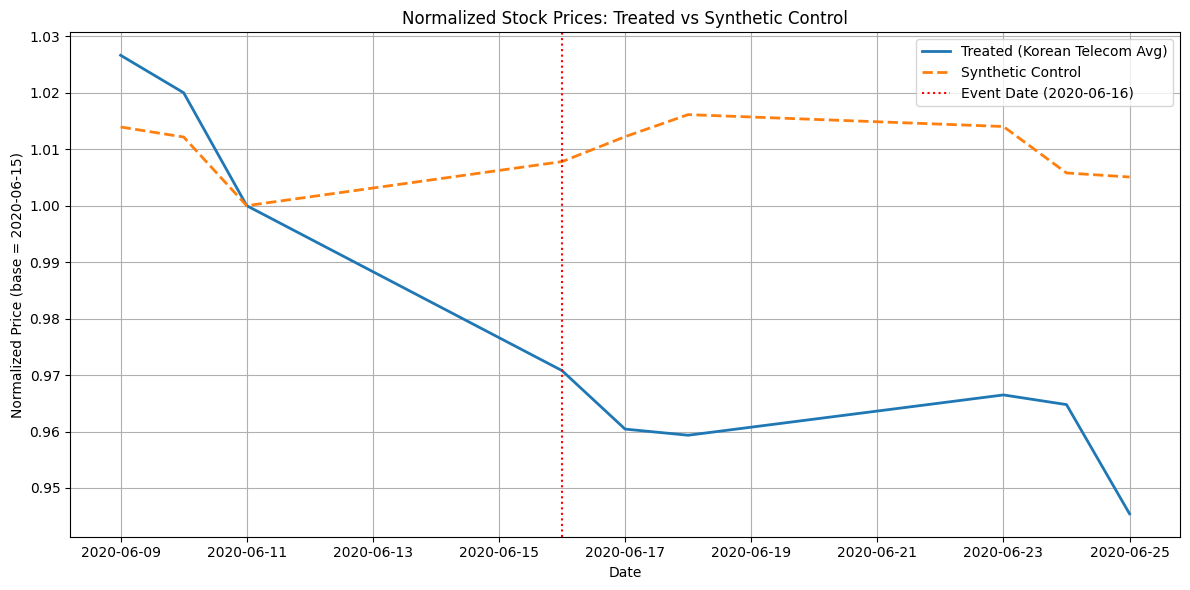

In [30]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA

df = df_tlcm
event_date = pd.to_datetime("2020-06-16")
pre_event_days = 200

# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

# 1. 각 종가들을 첫 날 기준으로 정규화
normalized_close_df = close_df / close_df.iloc[0]

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KT_Close','KR_SKT_Close','KR_LGU+_Close']

# 처리군 데이터 추출
X1_raw = normalized_close_df.loc[train_dates, treatment_cols]

# PCA를 위한 표준화
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1_raw)

# PCA 수행 (주성분 1개만 추출)
pca = PCA(n_components=1)
X1_pca = pca.fit_transform(X1_scaled)

# X1 벡터로 변환
X1 = X1_pca    # shape: (pre_event_days,)



# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_df.columns if not col.startswith("KR_")]
X0_df = normalized_close_df[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)



# 패널티를 도입하고 V의 합 제약을 제거한 SCM 최적화 함수 정의

def optimize_W_penalty(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]

    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)

    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V_penalty(X0, X1, W, alpha=1.0):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]

    def loss(v):
        v = np.clip(v, 1e-8, None)  # Ensure numerical stability
        V = np.diag(v)
        fit_term = float(residual.T @ V @ residual)
        penalty = alpha * np.sum(v**2)  # L2 penalty
        return fit_term + penalty

    bounds = [(0, None) for _ in range(k)]  # No sum constraint, allow V to grow
    result = minimize(loss, x0=np.ones(k), bounds=bounds)
    return result.x

def optimize_scm_penalty(X0, X1, alpha=1.0, max_iter=200, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k)
    prev_loss = float('inf')
    losses = []

    for t in range(max_iter):
        W = optimize_W_penalty(X0, X1, v)
        v = optimize_V_penalty(X0, X1, W, alpha=alpha)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0] + alpha * np.sum(v**2))
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            print(f"Converged at iteration {t+1}")
            break
        prev_loss = loss_val
    return W, v, loss_val, losses


# -----------------------------
# Step 4: Run SCM Optimization
# -----------------------------
W_opt, v_opt, final_loss, loss_trace = optimize_scm_penalty(X0, X1)


W_opt,v_opt



import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_df[treatment_cols]



# 3. 학습된 PCA로 전체 기간에 대해 변환
X1_full_pca = pca.transform(X1_full_raw)

# 4. 시계열 형태로 DataFrame 변환
X1_full = pd.Series(X1_full_pca.flatten(), index=normalized_close_df.index, name='X1_full')


# -----------------------------
# 2. 통제군 전체 시계열
# -----------------------------
X0_full_raw = normalized_close_df[non_kr_close_cols]                 # 통제군 종가
           


# X0 전체 구간에 대해 합성 통제군 생성
X0_full = X0_full_raw @ W_opt
X0_full = pd.Series(X0_full, index=X0_full_raw.index)


# 기준일(이벤트 하루 전)로 정규화
baseline_date = X1_full.index[X1_full.index < event_date].max()
X1_full_norm = X1_full / X1_full.loc[baseline_date]
X0_full_norm = X0_full / X0_full.loc[baseline_date]

# 시각화: 이벤트 발생일 전후 ±60일만 보여주기
window = 10
plot_start = event_date - pd.Timedelta(days=window)
plot_end = event_date + pd.Timedelta(days=window)
mask = (X1_full_norm.index >= plot_start) & (X1_full_norm.index <= plot_end)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(X1_full_norm[mask], label='Treated (Korean Telecom Avg)', linewidth=2)
plt.plot(X0_full_norm[mask], label='Synthetic Control', linewidth=2, linestyle='--')
plt.axvline(event_date, color='red', linestyle=':', label='Event Date (2020-06-16)')
plt.title("Normalized Stock Prices: Treated vs Synthetic Control")
plt.xlabel("Date")
plt.ylabel("Normalized Price (base = 2020-06-15)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


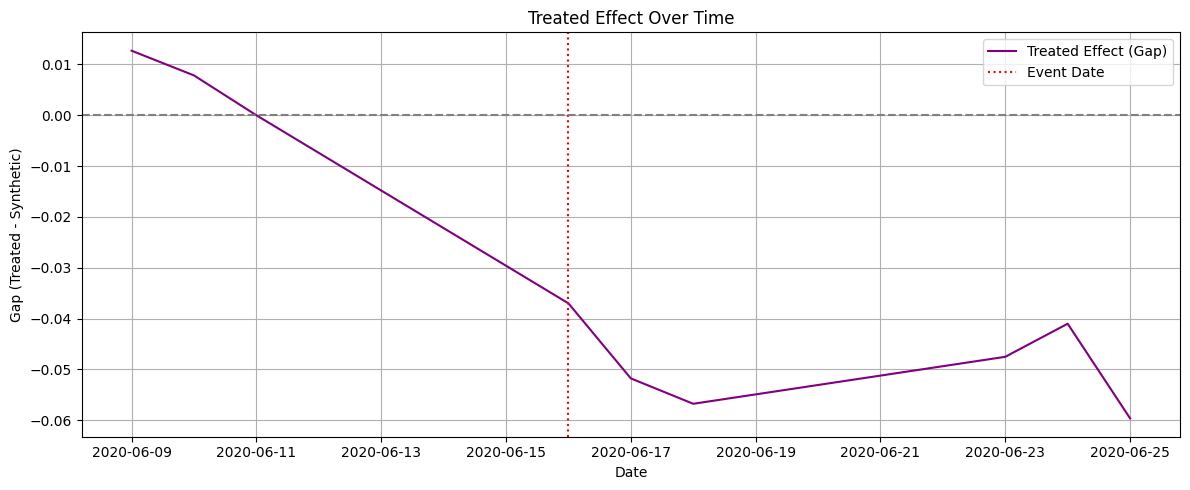

In [31]:
treated_effect = X1_full_norm - X0_full_norm

plt.figure(figsize=(12, 5))
plt.plot(treated_effect[mask], color='purple', label='Treated Effect (Gap)')
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Treated Effect Over Time")
plt.ylabel("Gap (Treated - Synthetic)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


KOR HEALTHCARE vs SYN HEALTHCARE

KOR HEALTHCARE vs SYN HEALTHCARE (by using mean)

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2140954948.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2140954948.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


Converged at iteration 3


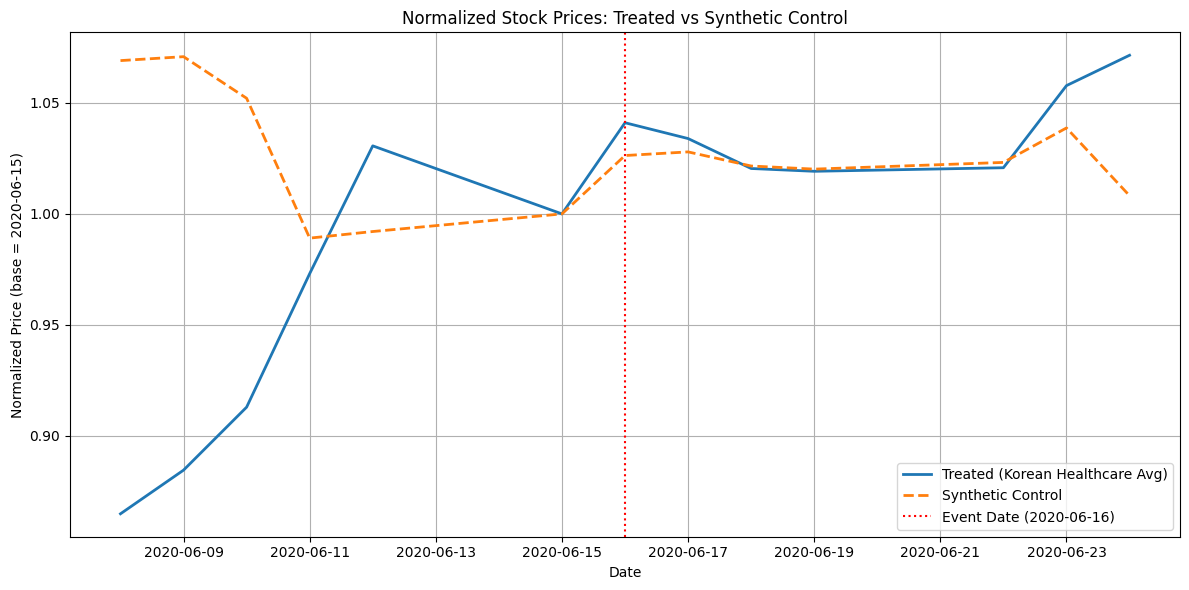

In [32]:
df = df_healthcare
event_date = pd.to_datetime("2020-06-16")
pre_event_days = 200

# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

# 1. 각 종가들을 첫 날 기준으로 정규화
normalized_close_df = close_df / close_df.iloc[0]

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

# 3. 처리군 X1: 한국 헬스케어만 평균
kr_close_cols = [col for col in normalized_close_df.columns if col.startswith("KR_")]
X1_series = normalized_close_df[kr_close_cols].mean(axis=1)

# 학습 구간에 대해서만 X1 벡터 만들기
X1 = X1_series.loc[train_dates].values.reshape(-1, 1)

# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 헬스케어
non_kr_close_cols = [col for col in normalized_close_df.columns if not col.startswith("KR_")]
X0_df = normalized_close_df[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)



# -----------------------------
# Step 3: Define SCM Optimization Functions
# -----------------------------
def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]

    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)

    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]

    def loss(v):
        if np.any(v < 0):
            return 1e6  # Penalty for constraint violation
        V = np.diag(v)
        return float(residual.T @ V @ residual)

    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []

    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            print(f"Converged at iteration {t+1}")
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# -----------------------------
# Step 4: Run SCM Optimization
# -----------------------------
W_opt1, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
X_synth = X0 @ W_opt1.reshape(-1, 1)

W_opt1,v_opt



import matplotlib.pyplot as plt

# 전체 기간에 대해 처리군 (X1) 시계열
X1_full = X1_series.loc[X0_df.index]  # 정규화된 한국 통신사 평균

# X0 전체 시계열에서 W 적용하여 합성 통제군 생성
X0_full = X0_df.loc[X0_df.index] @ W_opt1 # shape: (전체 기간, 1)

# DataFrame → Series로 변환 (flatten)
X0_full = pd.Series(X0_full.values.flatten(), index=X0_df.index)

# 기준일(이벤트 하루 전)로 정규화
baseline_date = X1_full.index[X1_full.index < event_date].max()
X1_full_norm = X1_full / X1_full.loc[baseline_date]
X0_full_norm = X0_full / X0_full.loc[baseline_date]

# 시각화: 이벤트 발생일 전후 ±60일만 보여주기
window = 10
plot_start = event_date - pd.Timedelta(days=window)
plot_end = event_date + pd.Timedelta(days=window)
mask = (X1_full_norm.index >= plot_start) & (X1_full_norm.index <= plot_end)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(X1_full_norm[mask], label='Treated (Korean Healthcare Avg)', linewidth=2)
plt.plot(X0_full_norm[mask], label='Synthetic Control', linewidth=2, linestyle='--')
plt.axvline(event_date, color='red', linestyle=':', label='Event Date (2020-06-16)')
plt.title("Normalized Stock Prices: Treated vs Synthetic Control")
plt.xlabel("Date")
plt.ylabel("Normalized Price (base = 2020-06-15)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KOR AERO vs SYN AERO

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/461902040.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/461902040.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


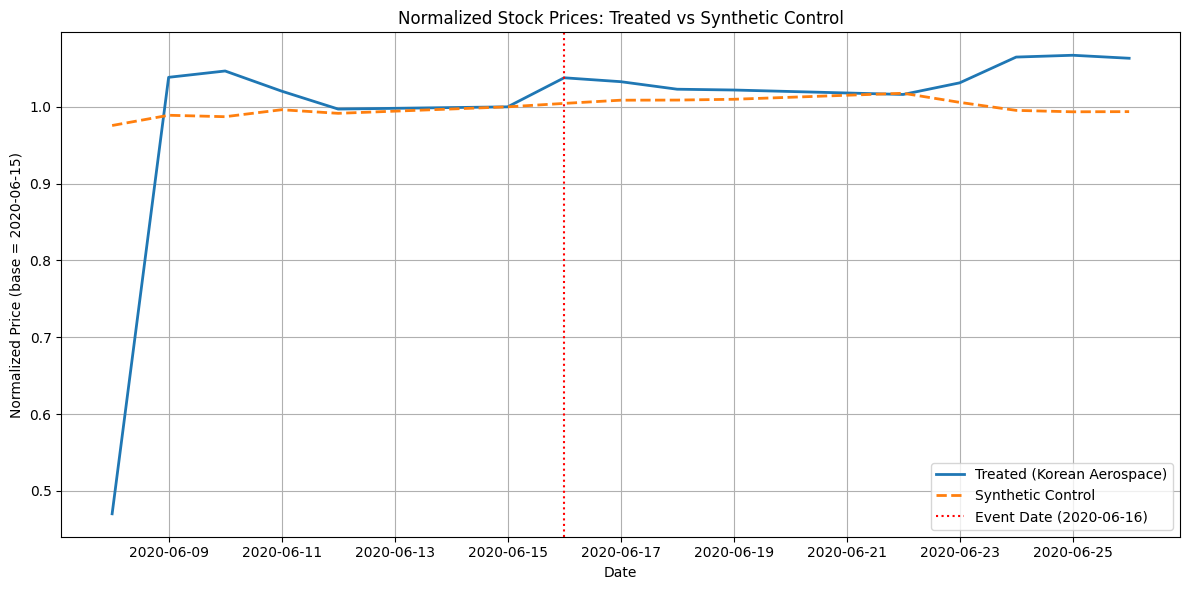

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df_aerospace = df_aerospace.dropna(axis=0)
df = df_aerospace
event_date = pd.to_datetime("2020-06-16")
pre_event_days = 200


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

# 1. 각 종가들을 첫 날 기준으로 정규화
normalized_close_df = close_df / close_df.iloc[0]

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Korean_Close','KR_Asiana_Close','KR_Jeju_Close']

# 처리군 데이터 추출
X1_raw = normalized_close_df.loc[train_dates, treatment_cols]

# PCA를 위한 표준화
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1_raw)

# PCA 수행 (주성분 1개만 추출)
pca = PCA(n_components=1)
X1_pca = pca.fit_transform(X1_scaled)

# X1 벡터로 변환
X1 = X1_pca    # shape: (pre_event_days,)




# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_df.columns if not col.startswith("KR_")]
X0_df = normalized_close_df[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

# 통제군 표준화 추가
scaler_x0 = StandardScaler()
X0_scaled = scaler_x0.fit_transform(X0_df.loc[train_dates])

# SCM 수행 시 이걸로 교체
X0 = X0_scaled

# =============================
# 4. SCM 최적화
# =============================
def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    for _ in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v

W_opt, v_opt = optimize_scm(X0, X1)

W_opt, v_opt


import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_df[treatment_cols]



# 3. 학습된 PCA로 전체 기간에 대해 변환
X1_full_pca = pca.transform(X1_full_raw)

# 4. 시계열 형태로 DataFrame 변환
X1_full = pd.Series(X1_full_pca.flatten(), index=normalized_close_df.index, name='X1_full')


# -----------------------------
# 2. 통제군 전체 시계열
# -----------------------------
X0_full_raw = normalized_close_df[non_kr_close_cols]                 # 통제군 종가
           


# X0 전체 구간에 대해 합성 통제군 생성
X0_full = X0_full_raw @ W_opt
X0_full = pd.Series(X0_full, index=X0_full_raw.index)


# 기준일(이벤트 하루 전)로 정규화
baseline_date = X1_full.index[X1_full.index < event_date].max()
X1_full_norm = X1_full / X1_full.loc[baseline_date]
X0_full_norm = X0_full / X0_full.loc[baseline_date]

# 시각화: 이벤트 발생일 전후 ±60일만 보여주기
window = 10
plot_start = event_date - pd.Timedelta(days=window)
plot_end = event_date + pd.Timedelta(days=window)
mask = (X1_full_norm.index >= plot_start) & (X1_full_norm.index <= plot_end)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(X1_full_norm[mask], label='Treated (Korean Aerospace)', linewidth=2)
plt.plot(X0_full_norm[mask], label='Synthetic Control', linewidth=2, linestyle='--')
plt.axvline(event_date, color='red', linestyle=':', label='Event Date (2020-06-16)')
plt.title("Normalized Stock Prices: Treated vs Synthetic Control")
plt.xlabel("Date")
plt.ylabel("Normalized Price (base = 2020-06-15)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Daily_GAP

In [34]:
from datetime import datetime, timedelta

코리안 이벤트 일자 종합
1. 2014-06-11 MSCI 한국 선진시장 지수 편입 실패
2. 2015-07-15 (대략) 대우조선해양 분식회계 사건
3. 2016-01-09 북한 핵실험 가속화
4. 2016-09-09 북한 핵실험 가속화
5. 2017-02-14 (대략) 사드 배치 및 중국 한한령
6. 2017-03-10 박근혜 탄핵 선고
7. 2017-07-04 북한 ICBM 1차 발사
8. 2017-05-09 박근혜 -> 문재인
8. 2017-09-03 북한 6차 핵실험
9. 2018-11-14 증선위 삼바 분식회계 인정

이 위는 다 데이터 문제로 안됨

10. 2019-03-15 (대략) 한진그룹 거버넌스 이슈 발생: 조양호 회장 퇴출
11. 2019-07-01 일본, 한국 화이트리스트에서 제거
12. 2020-06-16 남북공동연락사무소 폭파
13. 2021-05-03 공매도 제도 일부 개방
14. 2022-03-09 문재인 -> 윤석열
15. 2022-05-27 국민연금 한국 투자 축소 발표
16. 2023-10-30 3차 공매도 제한 발표
17. 2023-11-05 공매도 금지 발표
18. 2024-12-03 윤석열 계엄령 선포
19. 2025-03-31 공매도 금지 해제


In [80]:
event_date = pd.to_datetime("2020-06-16")
pre_event_days = 120
window = 25
plot_start = event_date - pd.Timedelta(days=window)
plot_end = event_date + pd.Timedelta(days=window)

### 통신 GAP(유의미)

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1474500900.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1474500900.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


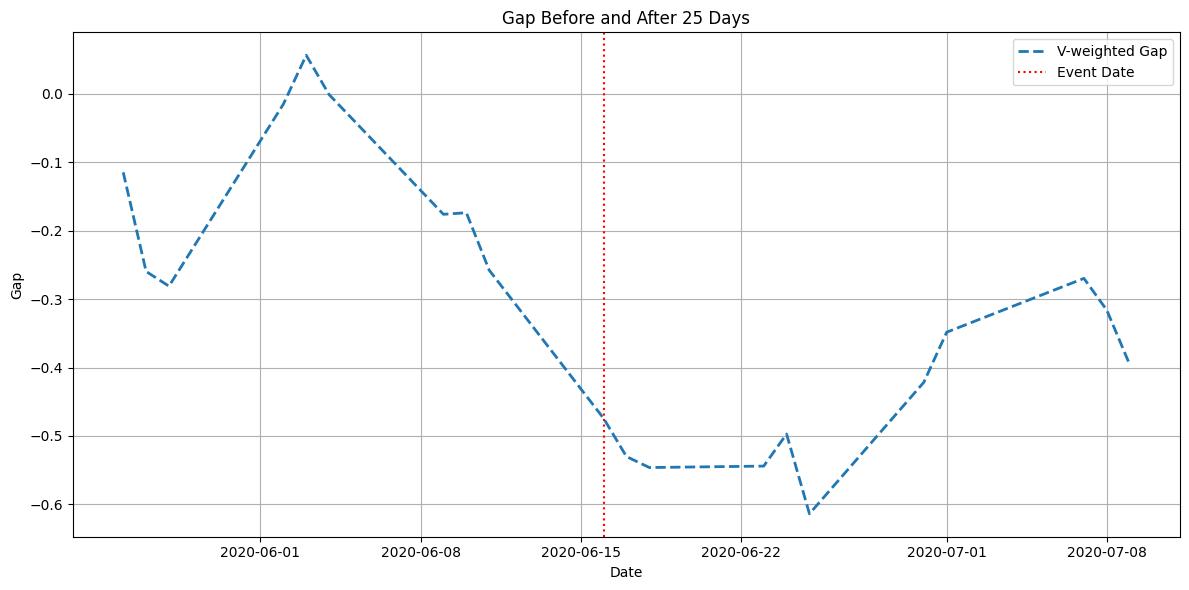

In [81]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_tlcm

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KT_Close','KR_SKT_Close','KR_LGU+_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_tlcm = gap.flatten() * v_full
weighted_gap_series_tlcm = pd.Series(weighted_gap_tlcm, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_tlcm.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 헬스케어 GAP(이상하게 증가함.. 섹터의 특수성 때문인듯함)

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1474500900.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1474500900.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


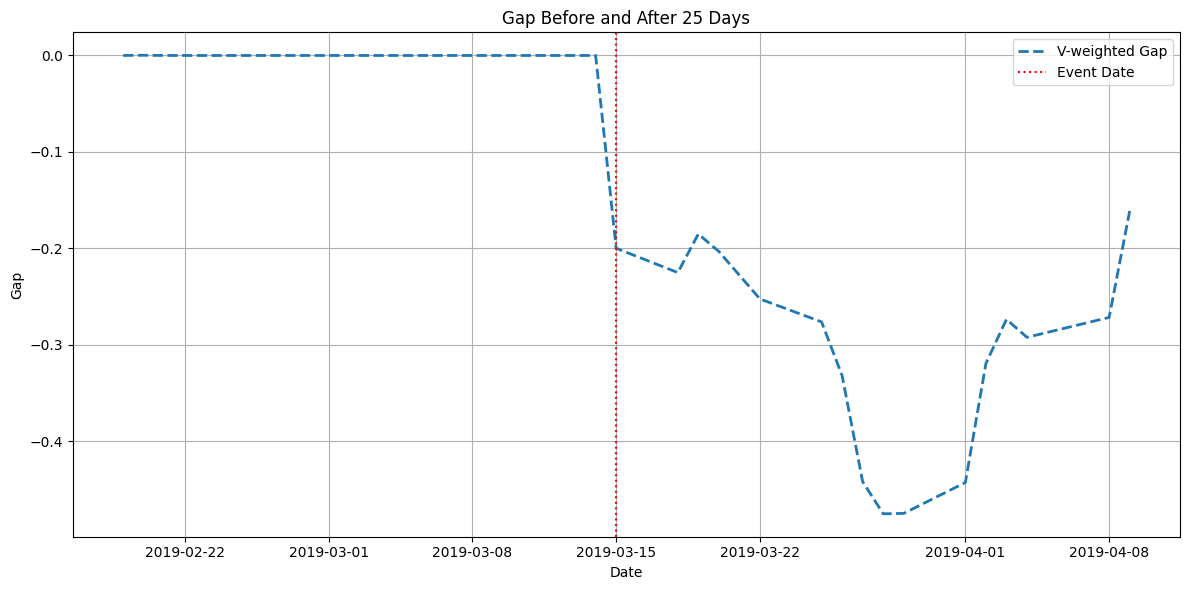

In [37]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA

df = df_healthcare



# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()


# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_SamsungBio_Close','KR_Celltrion_Close']


def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)



# 패널티를 도입하고 V의 합 제약을 제거한 SCM 최적화 함수 정의

# 코드 실행 환경 초기화로 인해 라이브러리 다시 불러오기
import pandas as pd
import numpy as np
from scipy.optimize import minimize

def check_nan(*args, name=""):
    for i, arg in enumerate(args):
        if np.isnan(arg).any():
            print(f"[NaN DETECTED] {name} - Argument {i} contains NaN")
            print(arg)
            return True
    return False

def optimize_W_penalty(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]

    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        if check_nan(W, residual, V, name="W loss"):
            raise ValueError("NaN in W loss function")
        return float(residual.T @ V @ residual)

    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    if not result.success:
        print(f"[W optimization failed] Message: {result.message}")
    return result.x

def optimize_V_penalty(X0, X1, W, alpha=10):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]

    def loss(v):
        v = np.clip(v, 1e-8, None)
        V = np.diag(v)
        fit_term = float(residual.T @ V @ residual)
        penalty = alpha * np.sum(v**2)
        total_loss = fit_term + penalty
        if check_nan(v, residual, total_loss, name="V loss"):
            raise ValueError("NaN in V loss function")
        return total_loss

    bounds = [(0, None) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k), bounds=bounds)
    if not result.success:
        print(f"[V optimization failed] Message: {result.message}")
    return result.x

def run_single_v_initialization(X0, X1, alpha=10, max_iter=50, tol=1e-6):
    T = X0.shape[0]

    v_init = np.exp(-((np.arange(T) - T//2)**2) / (2 * (T/6)**2))
    v_init = np.clip(v_init, 1e-8, None)

    v = v_init
    prev_loss = float('inf')
    losses = []

    for t in range(max_iter):
        print(f"Iteration {t+1}")
        W = optimize_W_penalty(X0, X1, v)
        v = optimize_V_penalty(X0, X1, W, alpha=alpha)

        residual = X1 - X0 @ W.reshape(-1, 1)
        if check_nan(residual, v, name="Main Loop"):
            raise ValueError(f"NaN detected during iteration {t+1}")
        
        loss_val = float((residual.T @ np.diag(v) @ residual)[0, 0] + alpha * np.sum(v**2))
        losses.append(loss_val)

        print(f"Loss at iteration {t+1}: {loss_val}")

        if abs(prev_loss - loss_val) < tol:
            print(f"Converged at iteration {t+1}")
            break
        prev_loss = loss_val

    return W, v, loss_val, losses

W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_healthcare = gap.flatten() * v_full
weighted_gap_series_healthcare = pd.Series(weighted_gap_healthcare, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_healthcare.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




### 항공 GAP(이것도 좋은 섹터는 아닌듯 함..변동성이 너무 커서)

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/4141537850.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/4141537850.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


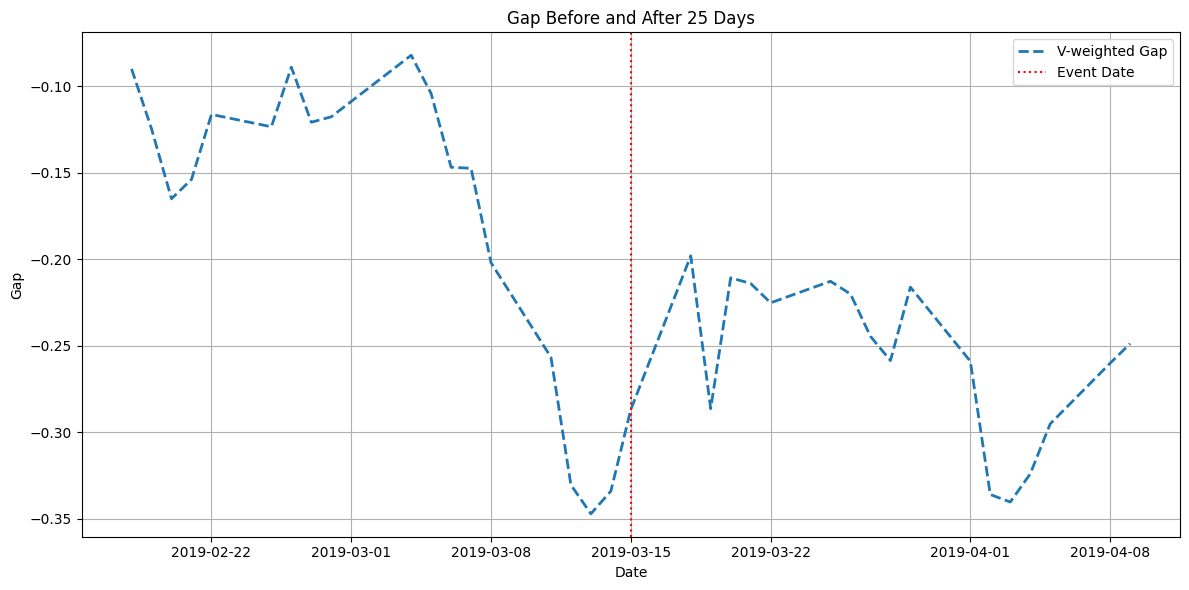

In [38]:

from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_aerospace

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Korean_Close','KR_Asiana_Close','KR_Jeju_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_aerospace = gap.flatten() * v_full
weighted_gap_series_aerospace = pd.Series(weighted_gap_aerospace, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_aerospace.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 자동차 GAP(유의미)

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/128802343.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/128802343.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


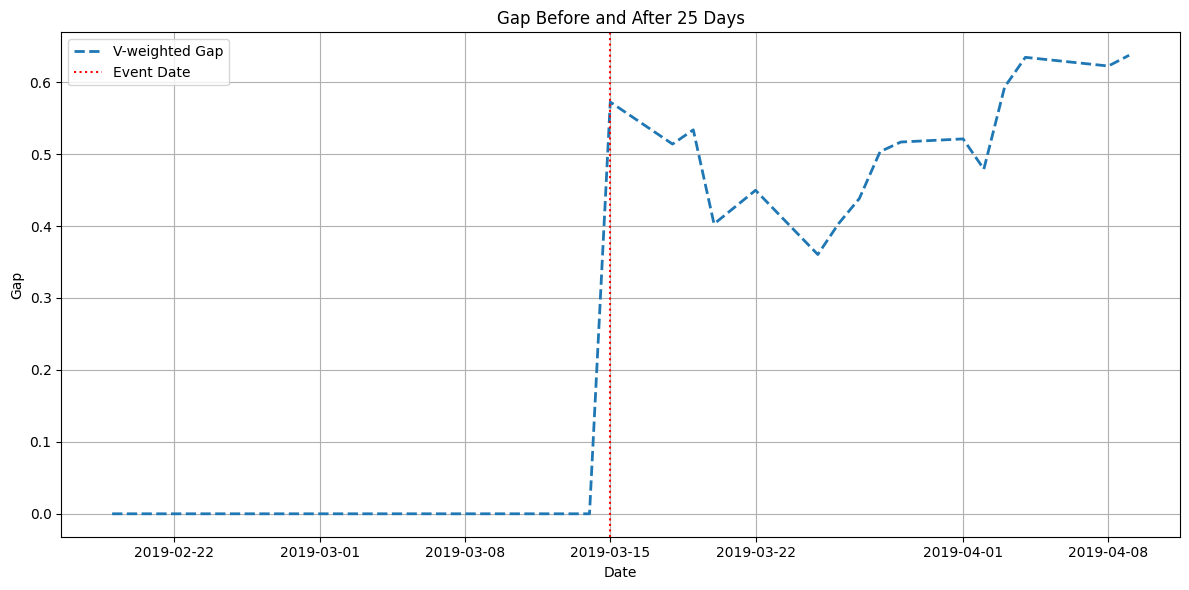

In [39]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_automobile

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Hyundai_Close','KR_Kia_Close','KR_KG Mobility_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_automobile = gap.flatten() * v_full
weighted_gap_series_automobile = pd.Series(weighted_gap_automobile, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_automobile.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 반도체

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/574311955.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/574311955.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


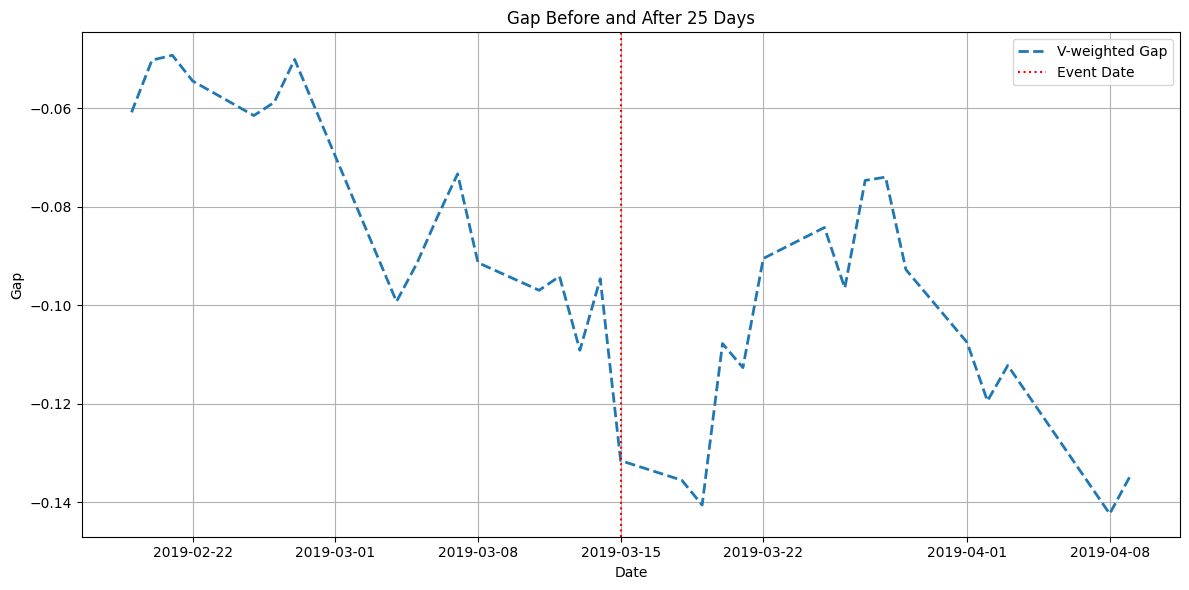

In [40]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_semi

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Samsung_Close', 'KR_SK_Hynix_Close', 'KR_Hanmi_Semicon_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_semi = gap.flatten() * v_full
weighted_gap_series_semi = pd.Series(weighted_gap_semi, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_semi.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 금융

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3631554956.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3631554956.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


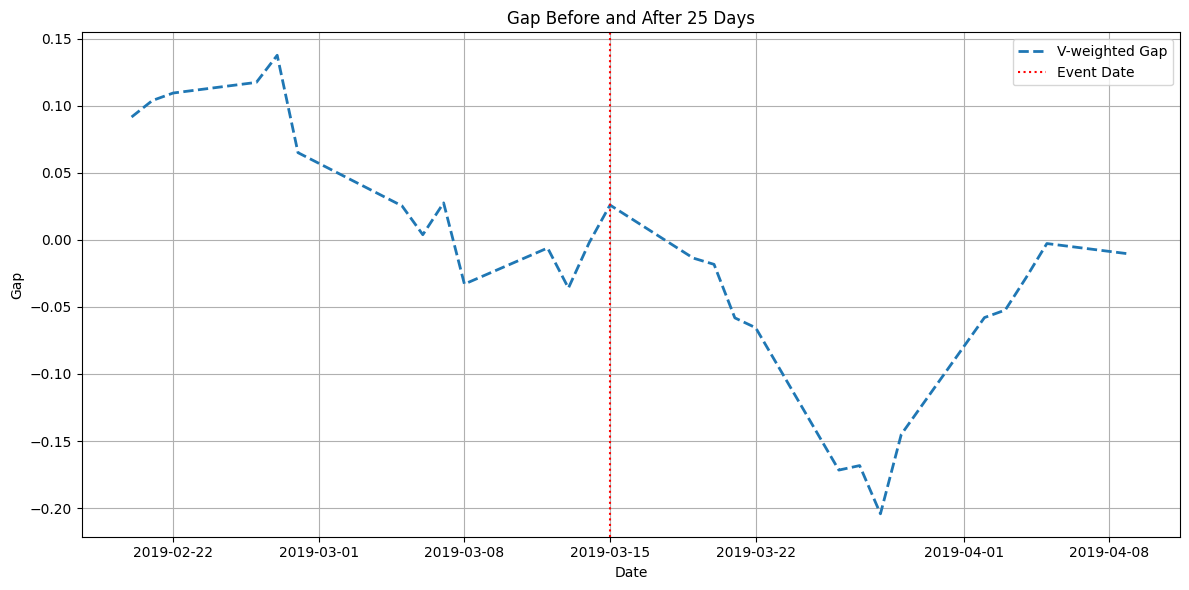

In [41]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_fin

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KB금융지주_Close', 'KR_삼성증권_Close', 'KR_삼성생명_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_fin = gap.flatten() * v_full
weighted_gap_series_fin = pd.Series(weighted_gap_fin, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_fin.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### IT

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/948485981.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/948485981.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


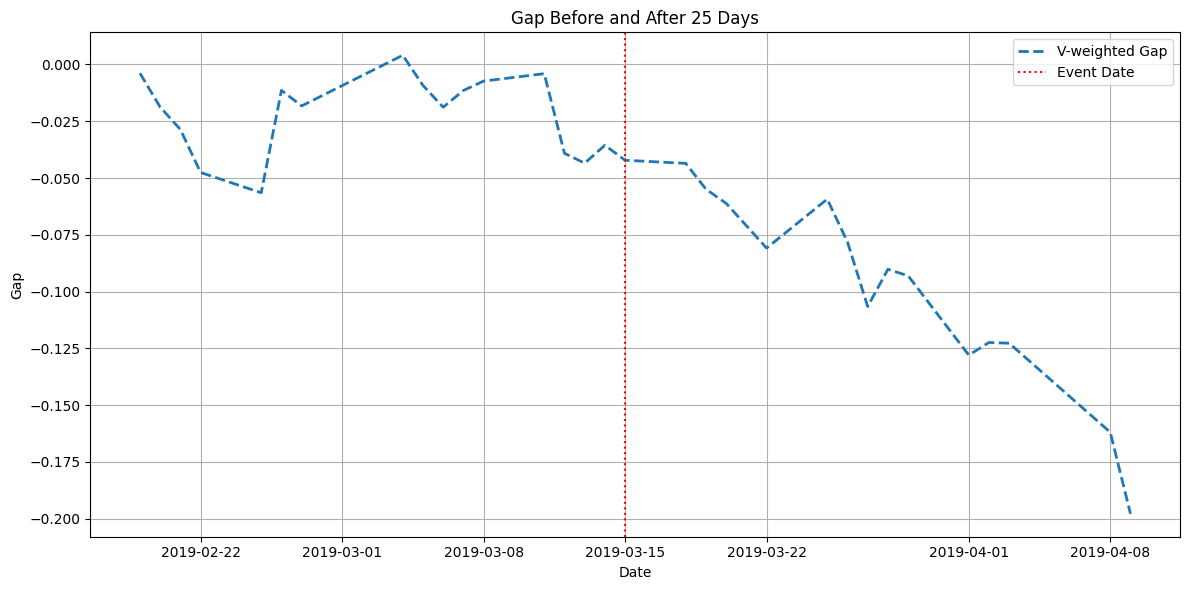

In [42]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_it

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Naver Corp_Close', 'KR_Kakao_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_it = gap.flatten() * v_full
weighted_gap_series_it = pd.Series(weighted_gap_it, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_it.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### GAP 종합하기

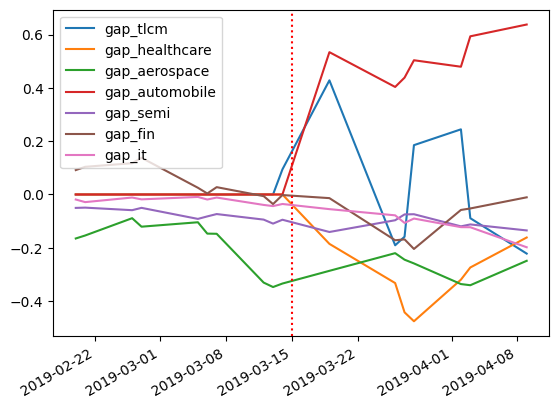

In [43]:
df_gap = pd.DataFrame({'gap_tlcm': weighted_gap_series_tlcm[plot_start:plot_end], 'gap_healthcare': weighted_gap_series_healthcare[plot_start:plot_end],
                        'gap_aerospace': weighted_gap_series_aerospace[plot_start:plot_end], 'gap_automobile': weighted_gap_series_automobile[plot_start:plot_end],
                        'gap_semi': weighted_gap_series_semi, 'gap_fin': weighted_gap_series_fin, 'gap_it': weighted_gap_series_it})

df_gap = df_gap.dropna(axis = 0)
ax = df_gap.plot()
ax.axvline(event_date, color='red', linestyle=':', label='Event Date')


In [44]:
df_gap.to_excel(f"df_gap_{event_date:%Y-%m-%d}.xlsx", index = True)

# Daily_GAP_CVaR

In [45]:
event_date = pd.to_datetime("2019-03-15") # 이벤트 일 설정
pre_event_days = 120 # 이벤트 전 몇 일을 시험 기간으로 볼 지
window = 25 # 시각화 시 이벤트일 전후로 몇 일을 볼지, 숫자가 커질수록 그래프가 양옆으로 길어짐(값 변환x, 시각화 상으로 그렇다는거)

# 이벤트일 기준 ±60일 구간 설정: 이걸로 df_gap 및 df_gap_cvar의 length도 정해짐
plot_start = event_date - pd.Timedelta(days=window)
plot_end = event_date + pd.Timedelta(days=window)


### 통신

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/381230947.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/381230947.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


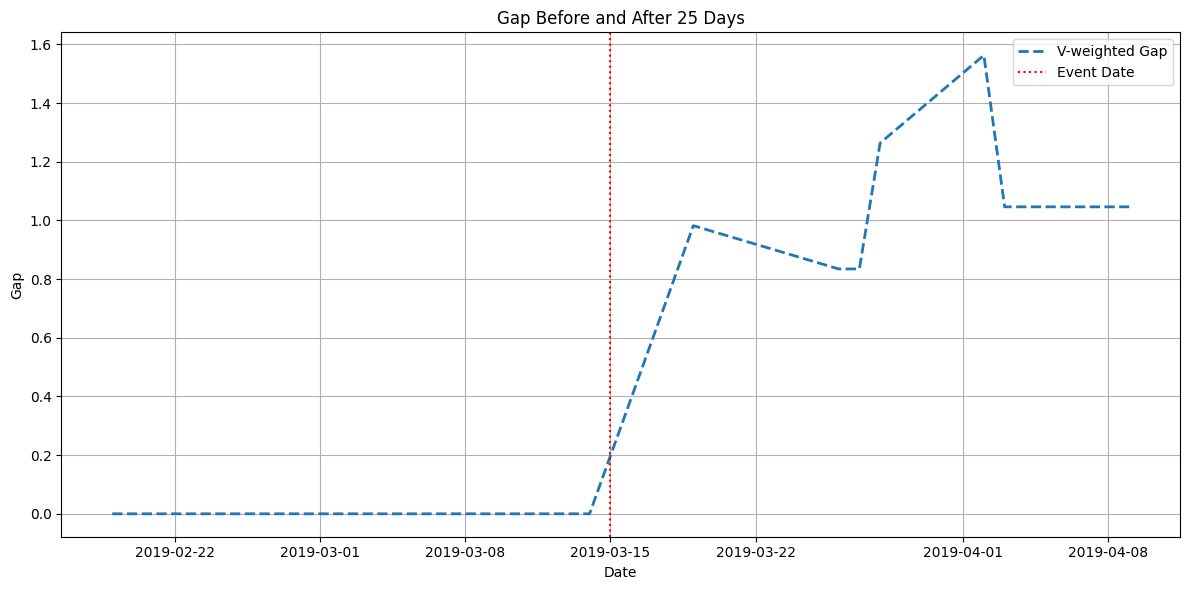

In [46]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_tlcm_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KT_Close_CVaR_95', 'KR_SKT_Close_CVaR_95', 'KR_LGU+_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_tlcm_cvar = gap.flatten() * v_full
weighted_gap_series_tlcm_cvar = pd.Series(weighted_gap_tlcm_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_tlcm_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 헬스케어

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/316741945.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/316741945.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


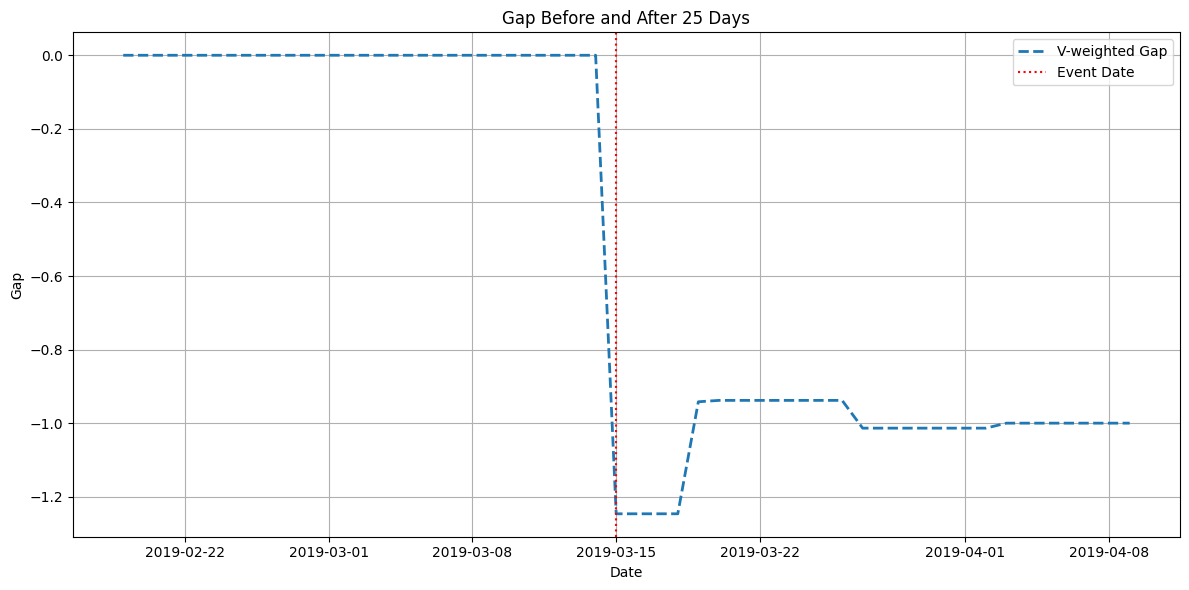

In [47]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_healthcare_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_SamsungBio_Close_CVaR_95' ,'KR_Celltrion_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_healthcare_cvar = gap.flatten() * v_full
weighted_gap_series_healthcare_cvar = pd.Series(weighted_gap_healthcare_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_healthcare_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 항공

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1321688923.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1321688923.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


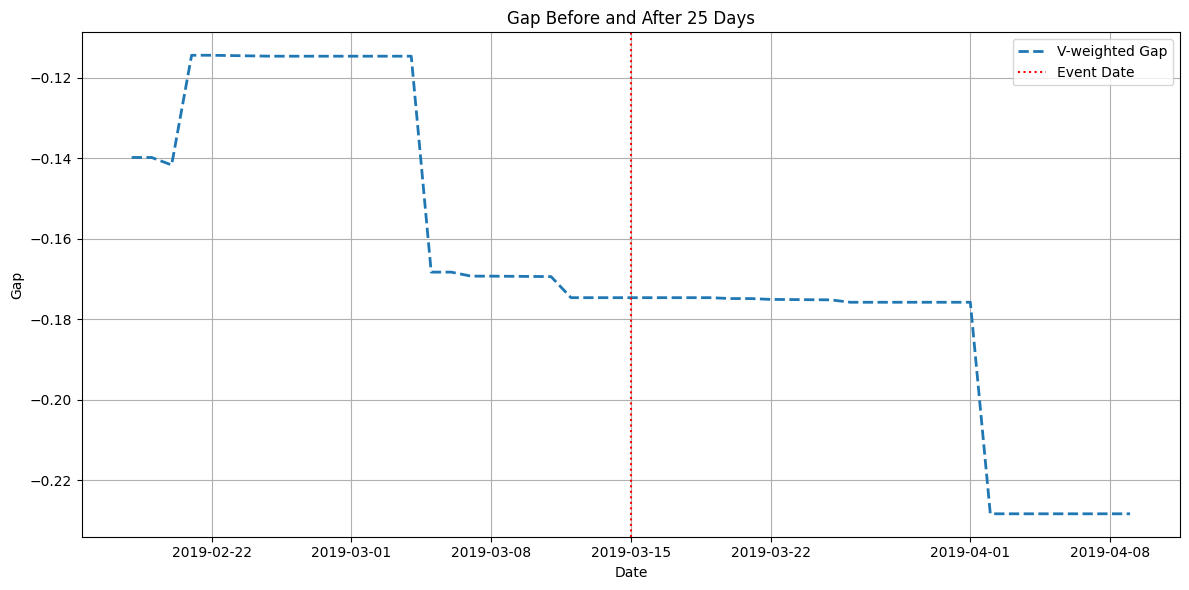

In [48]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_aerospace_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Korean_Close_CVaR_95', 'KR_Asiana_Close_CVaR_95', 'KR_Jeju_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_aerospace_cvar = gap.flatten() * v_full
weighted_gap_series_aerospace_cvar = pd.Series(weighted_gap_aerospace_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_aerospace_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 자동차

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2694531585.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2694531585.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


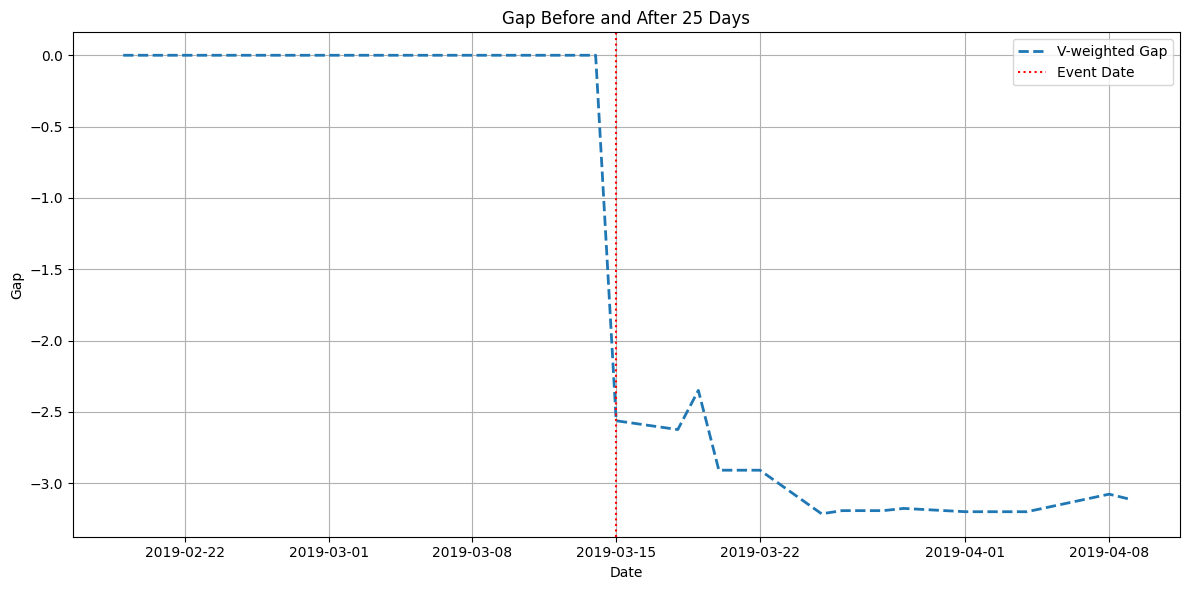

In [49]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_automobile_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Hyundai_Close_CVaR_95', 'KR_Kia_Close_CVaR_95', 'KR_KG Mobility_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_automobile_cvar = gap.flatten() * v_full
weighted_gap_series_automobile_cvar = pd.Series(weighted_gap_automobile_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_automobile_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 반도체

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1585692557.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1585692557.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


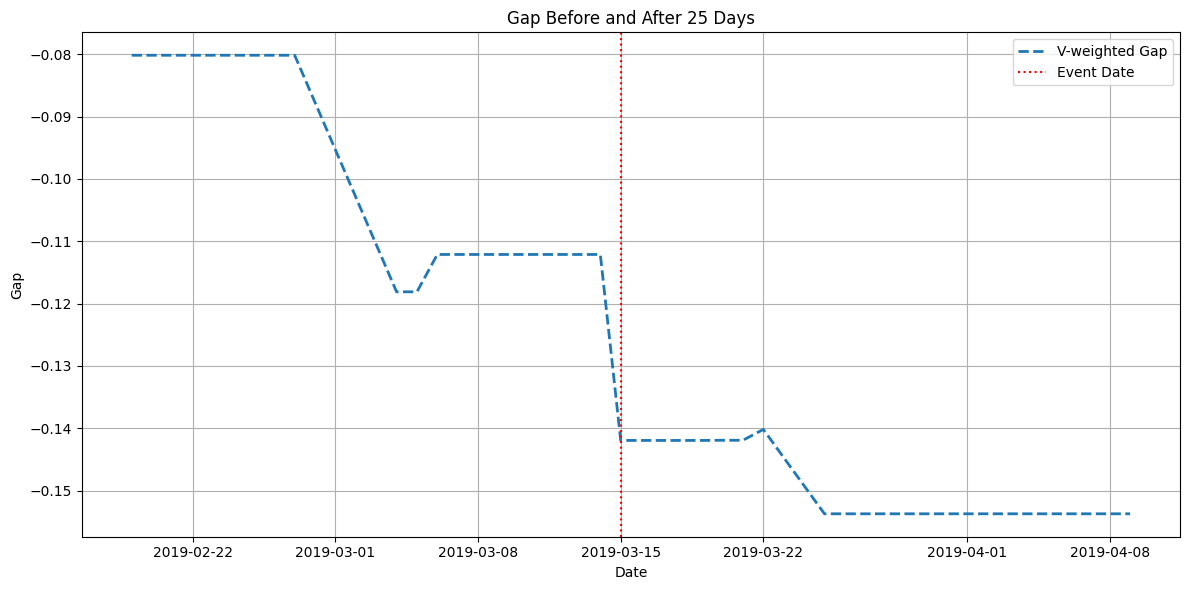

In [50]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_semi_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Samsung_Close_CVaR_95', 'KR_SK_Hynix_Close_CVaR_95', 'KR_Hanmi_Semicon_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_semi_cvar = gap.flatten() * v_full
weighted_gap_series_semi_cvar = pd.Series(weighted_gap_semi_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_semi_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 금융

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3116029186.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3116029186.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


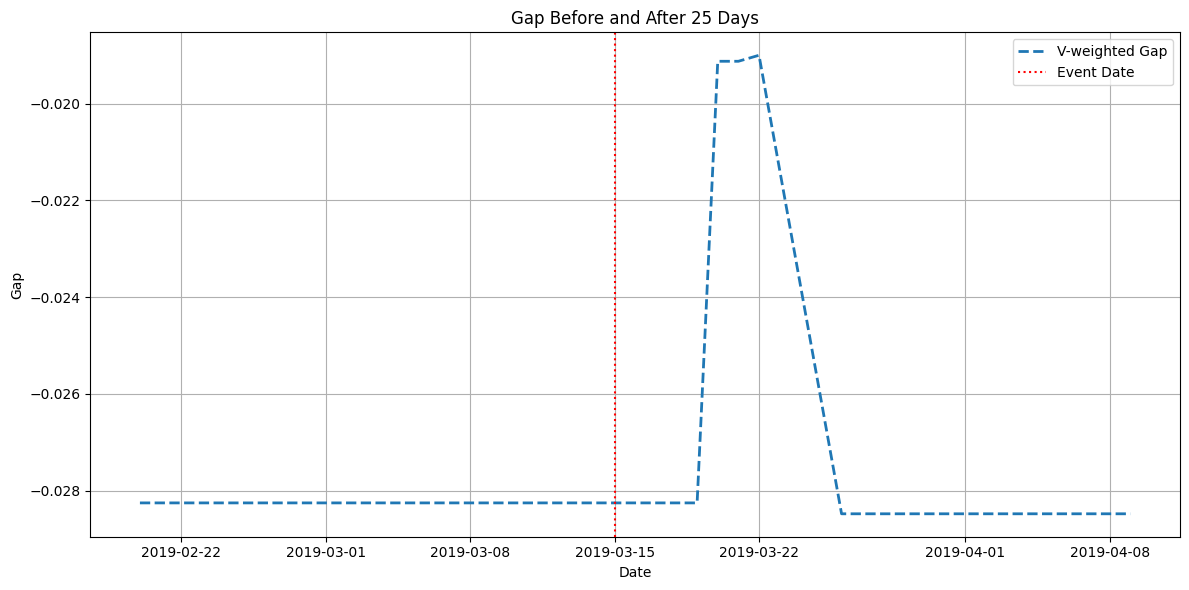

In [51]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_fin_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KB금융지주_Close_CVaR_95', 'KR_삼성증권_Close_CVaR_95', 'KR_삼성생명_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_fin_cvar = gap.flatten() * v_full
weighted_gap_series_fin_cvar = pd.Series(weighted_gap_fin_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_fin_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### IT

In [52]:
df_it_cvar

,KR_Naver Corp_Close_CVaR_95,KR_Kakao_Close_CVaR_95,US_Apple_Close_CVaR_95,US_Microsoft_Close_CVaR_95,JP_Sony_Close_CVaR_95,JP_Keyence_Close_CVaR_95,TW_Hon Hai Precision_Close_CVaR_95,TW_CHT_Close_CVaR_95
2015-01-07,-0.014805,0.005536,-0.009484,-0.024389,-0.011407,-0.034557,-0.033392,-0.007838
2015-01-08,-0.014805,-0.006073,-0.009484,-0.024389,-0.011407,-0.034557,-0.033392,-0.007838
2015-01-09,-0.014805,-0.006073,-0.009484,-0.024389,-0.011407,-0.034557,-0.033392,-0.007838
2015-01-13,-0.015957,-0.046154,-0.022457,-0.024389,-0.031626,-0.034557,-0.033392,-0.007838
2015-01-14,-0.015957,-0.046154,-0.022457,-0.024389,-0.031626,-0.034557,-0.033392,-0.007838
...,...,...,...,...,...,...,...,...
2025-02-20,-0.115894,-0.147505,-0.039234,-0.037417,-0.042281,-0.046029,-0.038201,-0.020138
2025-02-21,-0.115894,-0.147505,-0.039234,-0.037417,-0.042281,-0.046029,-0.038201,-0.020138
2025-02-25,-0.115894,-0.147505,-0.039234,-0.037417,-0.042281,-0.046029,-0.038229,-0.020138
2025-02-26,-0.115894,-0.147505,-0.039237,-0.037417,-0.042281,-0.046029,-0.038229,-0.020138


/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/4055374800.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/4055374800.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


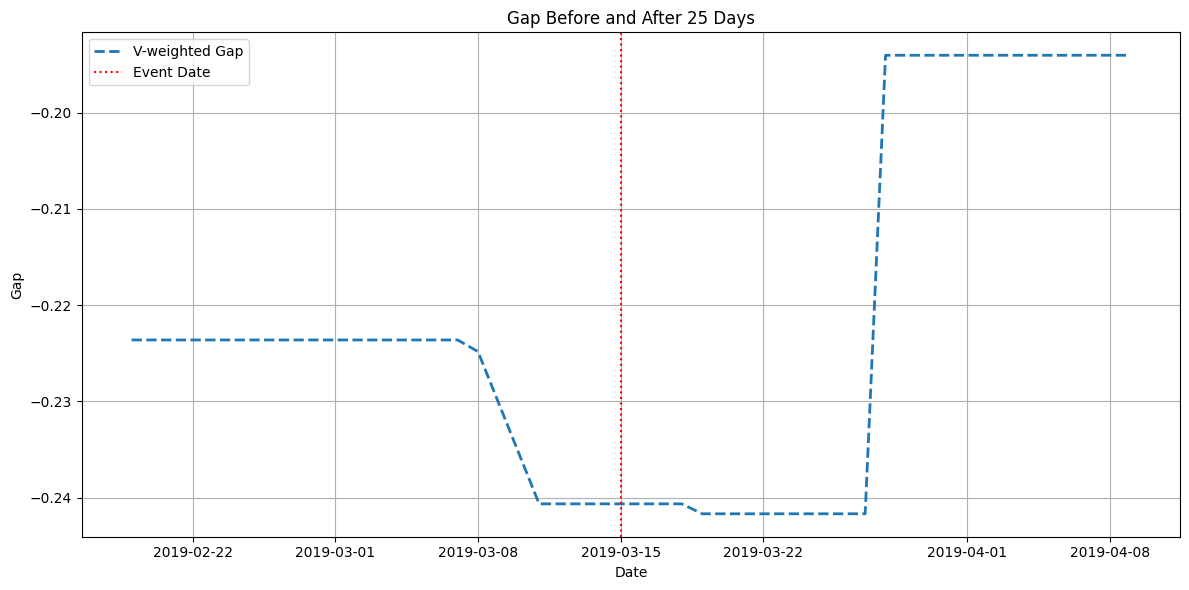

In [53]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = df_it_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Naver Corp_Close_CVaR_95','KR_Kakao_Close_CVaR_95'] 

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weighted_gap_it_cvar = gap.flatten() * v_full
weighted_gap_series_it_cvar = pd.Series(weighted_gap_it_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weighted_gap_series_it_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Gap Before and After 25 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### CVaR GAP 종합

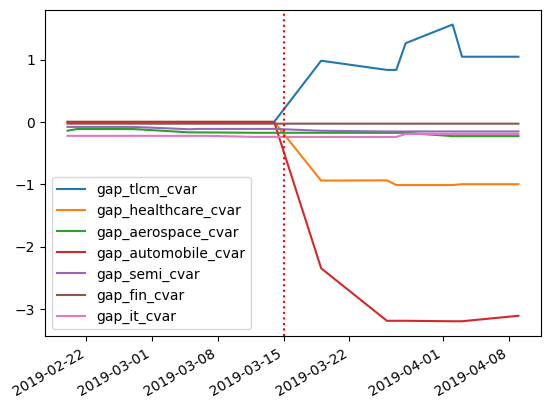

In [54]:
df_gap_cvar = pd.DataFrame({'gap_tlcm_cvar': weighted_gap_series_tlcm_cvar[plot_start: plot_end], 'gap_healthcare_cvar': weighted_gap_series_healthcare_cvar[plot_start: plot_end],
                        'gap_aerospace_cvar': weighted_gap_series_aerospace_cvar[plot_start: plot_end], 'gap_automobile_cvar': weighted_gap_series_automobile_cvar[plot_start: plot_end],
                        'gap_semi_cvar': weighted_gap_series_semi_cvar[plot_start: plot_end], 'gap_fin_cvar': weighted_gap_series_fin_cvar[plot_start: plot_end],
                        'gap_it_cvar': weighted_gap_series_it_cvar[plot_start: plot_end]})

df_gap_cvar = df_gap_cvar.dropna(axis = 0)

ax = df_gap_cvar.plot()
ax.axvline(event_date, color='red', linestyle=':', label='Event Date')


In [55]:
df_gap_cvar.to_excel(f"df_gap_cvar_{event_date:%Y-%m-%d}.xlsx", index = True)

# Weekly_GAP

주별로 묶은 경우엔 이벤트 전후 25일이 너무 짧기에 약 100영업일(20주)로 설정해봄

In [56]:
event_date = pd.to_datetime("2024-01-03")
pre_event_days = 120
window = 100
plot_start = event_date - pd.Timedelta(days=window)
plot_end = event_date + pd.Timedelta(days=window)

### 통신

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/600050001.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/600050001.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


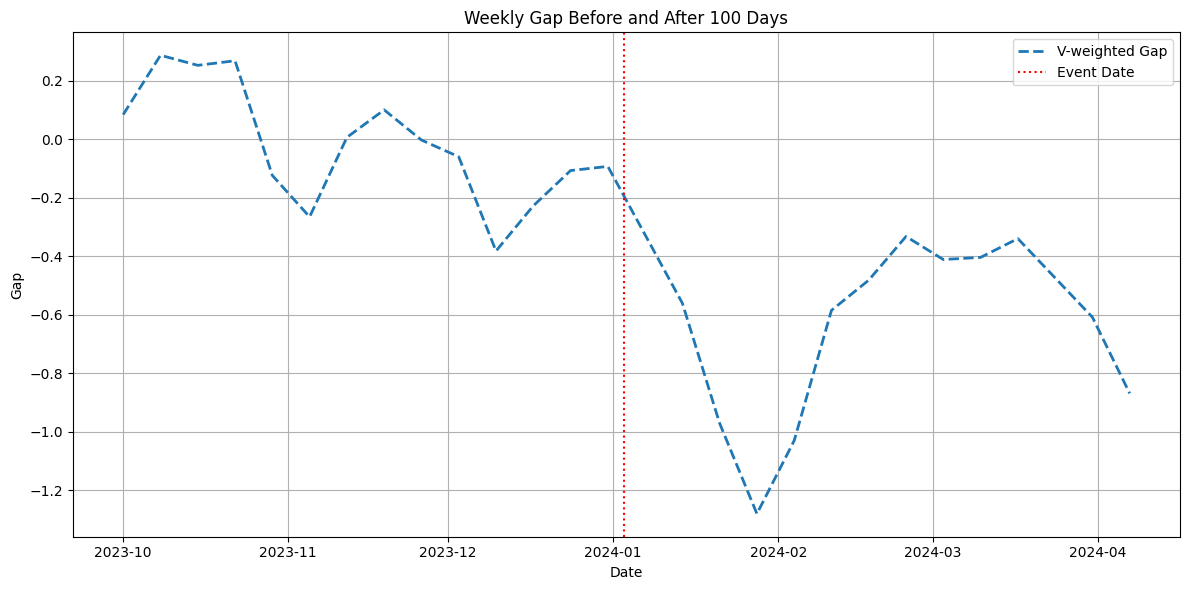

In [57]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_tlcm

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KT_Close','KR_SKT_Close','KR_LGU+_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_tlcm = gap.flatten() * v_full
weekly_weighted_gap_series_tlcm = pd.Series(weekly_weighted_gap_tlcm, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_tlcm.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 헬스케어

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2151115110.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2151115110.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


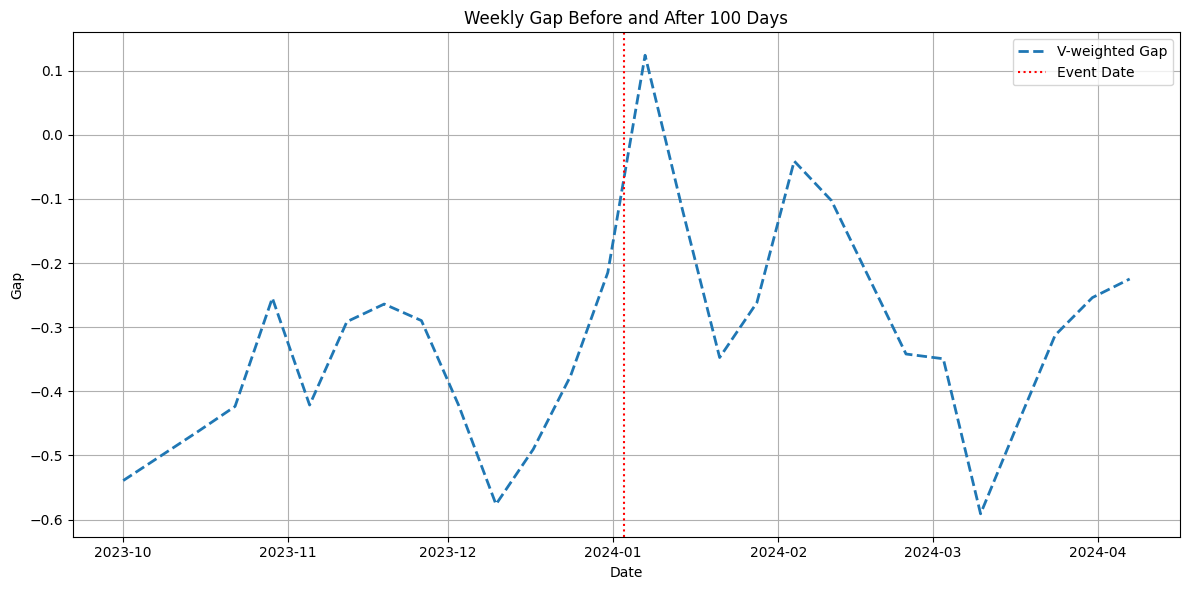

In [58]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_healthcare

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_SamsungBio_Close', 'KR_Celltrion_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_healthcare = gap.flatten() * v_full
weekly_weighted_gap_series_healthcare = pd.Series(weekly_weighted_gap_healthcare, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_healthcare.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 항공

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/883539295.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/883539295.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


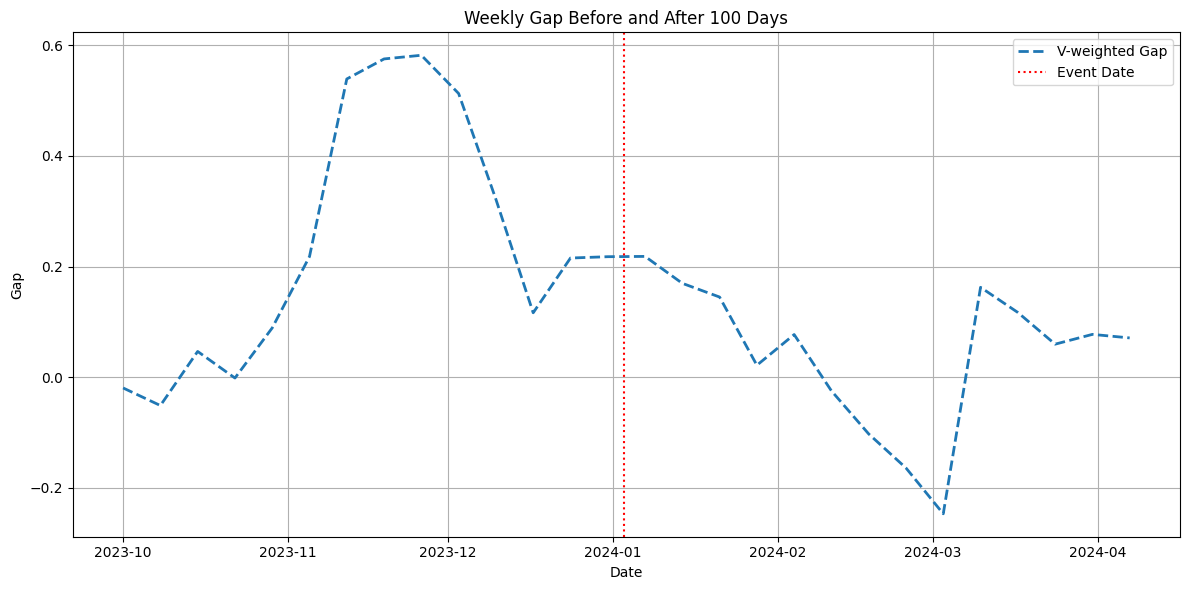

In [59]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_aerospace

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Korean_Close', 'KR_Asiana_Close', 'KR_Jeju_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_aerospace = gap.flatten() * v_full
weekly_weighted_gap_series_aerospace = pd.Series(weekly_weighted_gap_aerospace, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_aerospace.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 반도체

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1284203284.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1284203284.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


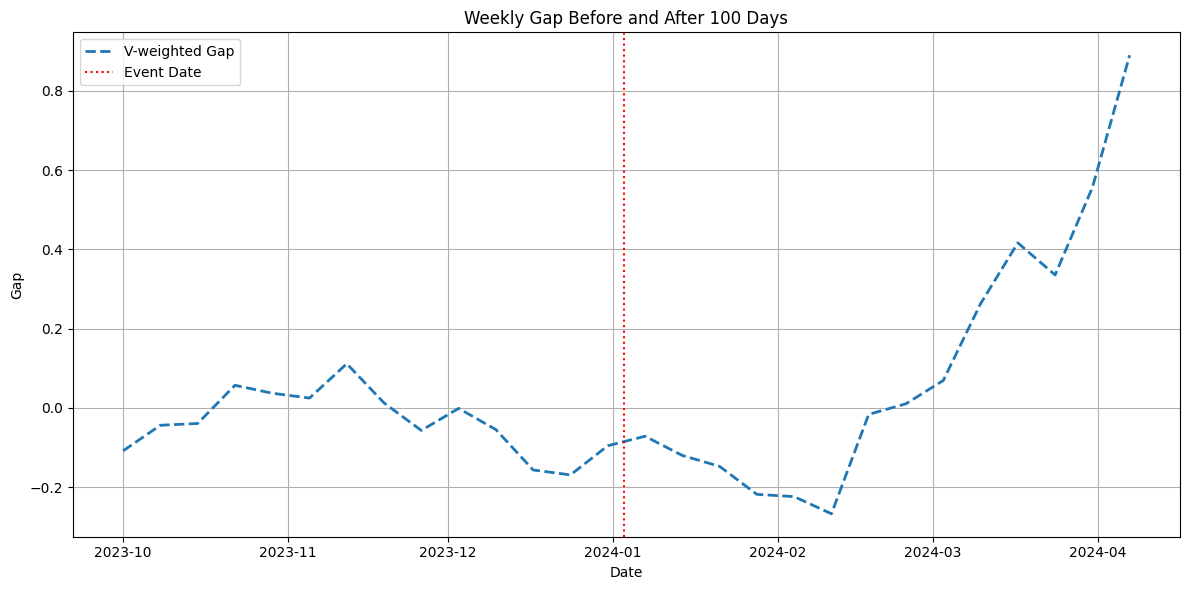

In [60]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_semi

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Samsung_Close', 'KR_SK_Hynix_Close', 'KR_Hanmi_Semicon_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_semi = gap.flatten() * v_full
weekly_weighted_gap_series_semi = pd.Series(weekly_weighted_gap_semi, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_semi.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 금융

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1970404776.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1970404776.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


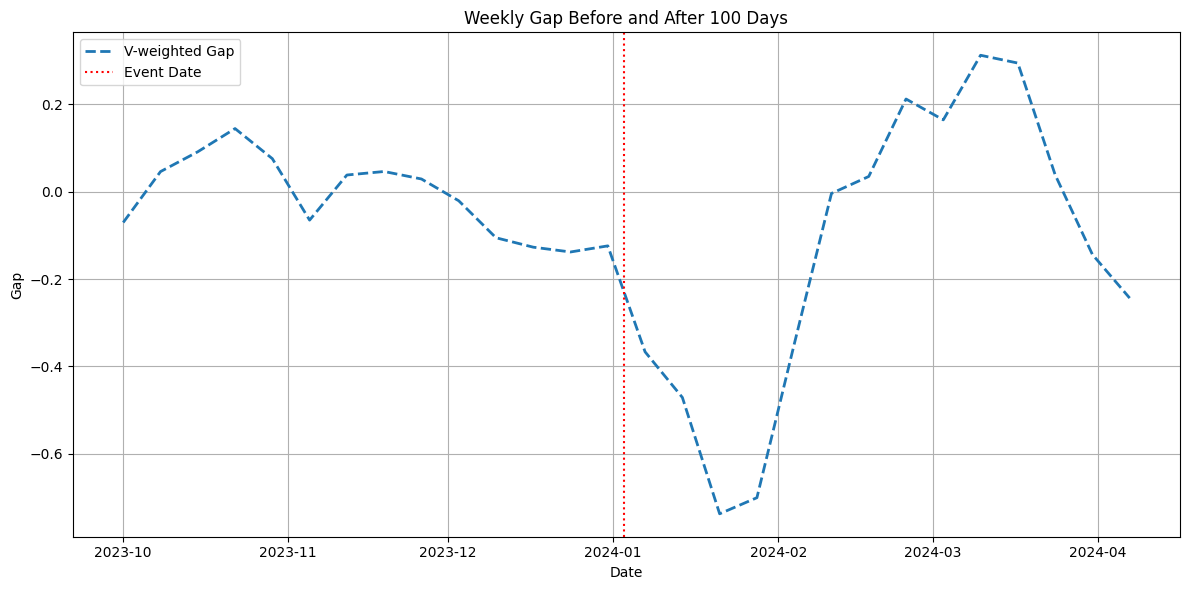

In [61]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_fin

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KB금융지주_Close', 'KR_삼성증권_Close', 'KR_삼성생명_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_fin = gap.flatten() * v_full
weekly_weighted_gap_series_fin = pd.Series(weekly_weighted_gap_fin, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_fin.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 자동차

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2584797617.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2584797617.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


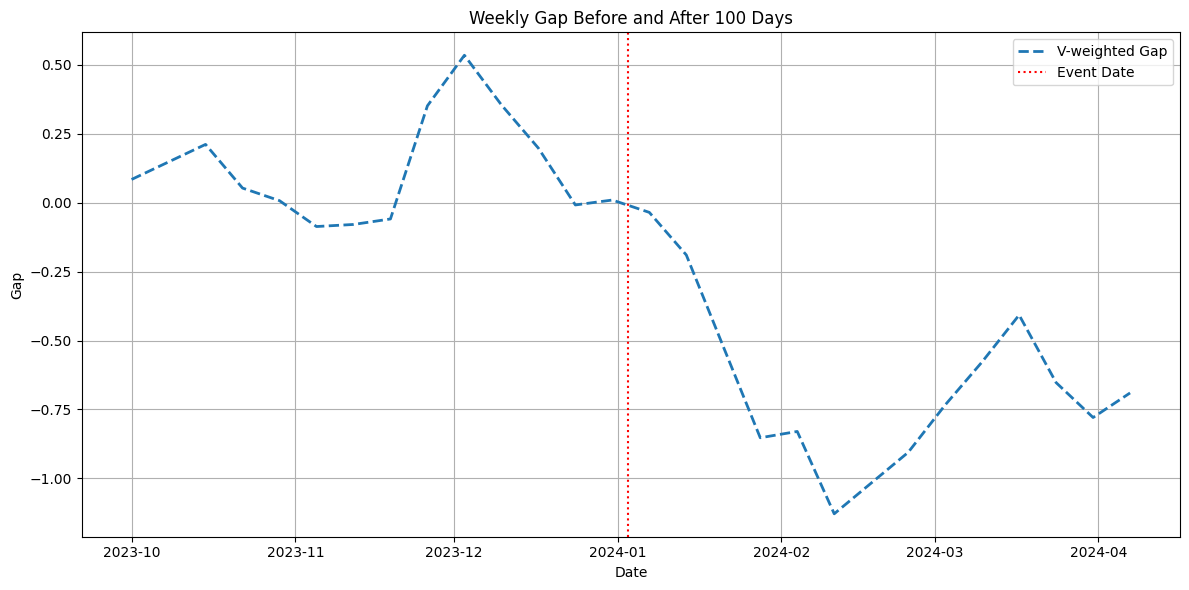

In [62]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_automobile

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Hyundai_Close', 'KR_Kia_Close', 'KR_KG Mobility_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_automobile = gap.flatten() * v_full
weekly_weighted_gap_series_automobile = pd.Series(weekly_weighted_gap_automobile, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_automobile.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### IT

In [63]:
weekly_df_it

,KR_Naver Corp_Close,KR_Kakao_Close,US_Apple_Close,US_Microsoft_Close,JP_Sony_Close,JP_Keyence_Close,TW_Hon Hai Precision_Close,TW_CHT_Close
2015-01-11,744000.000000,29392.0,29837.712220,51105.866760,4649.396224,240320.333400,2540.316066,3162.462120
2015-01-18,758250.000000,29745.0,29163.174875,49598.242125,4521.846785,242004.340500,2522.564660,3211.492025
2015-01-25,778750.000000,30525.0,30010.140525,50492.531700,4761.386763,247566.067875,2567.708370,3284.377750
2015-02-01,752800.000000,31072.0,31224.722160,46410.321700,5122.453246,257275.379600,2642.769740,3316.140120
2015-02-08,715000.000000,29760.0,32524.330000,45772.418540,5339.612394,264837.183400,2616.307074,3317.873220
...,...,...,...,...,...,...,...,...
2025-01-26,204250.000000,36375.0,319982.732800,626906.284500,29899.419000,619577.350000,7859.484750,5436.965750
2025-02-09,224400.000000,43140.0,334865.227020,598332.518380,32956.116700,595536.526000,7518.056900,5542.578500
2025-02-16,223375.000000,40862.5,343395.111050,592541.335925,32880.746775,599609.840250,7817.936250,5541.005375
2025-02-23,223125.000000,39475.0,352040.108675,591837.148850,35987.873225,605908.416000,8015.636500,5550.082250


<Axes: >

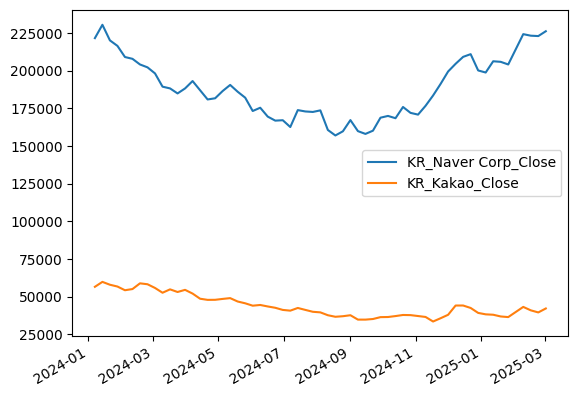

In [64]:
weekly_df_it[['KR_Naver Corp_Close', 'KR_Kakao_Close']].loc['2024-01-01':].plot()

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1196872187.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1196872187.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


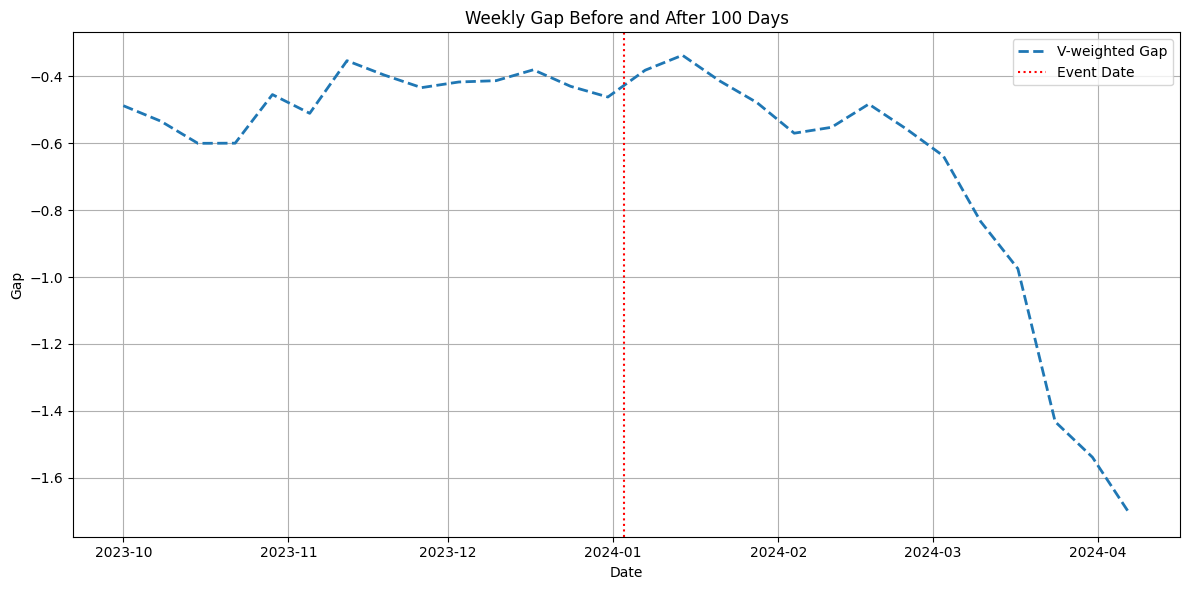

In [65]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_it

# 모든 열에 대해 쉼표 제거하고 float로 변환
def convert_to_numeric(df):
    return df.apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', ''), errors='coerce'))


# 종가만 추출 (Close로 끝나는 컬럼들)
close_cols = [col for col in df.columns if col.endswith("_Close")]
close_df = df[close_cols].sort_index()

close_df = convert_to_numeric(close_df)

close_df = close_df.interpolate(method='linear', limit_direction='both')
close_df = close_df.ffill().bfill()



# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Naver Corp_Close', 'KR_Kakao_Close']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(close_df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)





def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss





import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_it = gap.flatten() * v_full
weekly_weighted_gap_series_it = pd.Series(weekly_weighted_gap_it, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_it.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Weekly Gap 종합

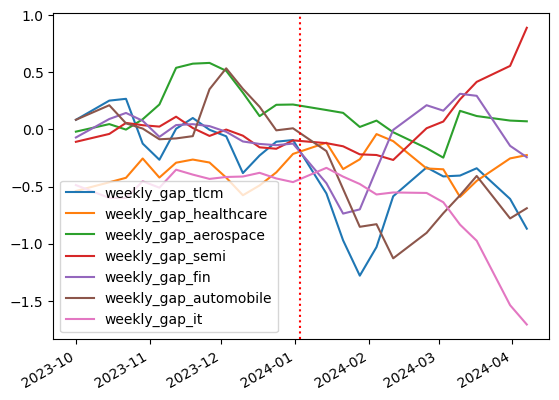

In [66]:
weekly_df_gap = pd.DataFrame({'weekly_gap_tlcm': weekly_weighted_gap_series_tlcm[plot_start:plot_end], 'weekly_gap_healthcare': weekly_weighted_gap_series_healthcare[plot_start:plot_end],
                              'weekly_gap_aerospace': weekly_weighted_gap_series_aerospace[plot_start:plot_end], 'weekly_gap_semi': weekly_weighted_gap_series_semi[plot_start:plot_end],
                              'weekly_gap_fin': weekly_weighted_gap_series_fin[plot_start:plot_end], 'weekly_gap_automobile': weekly_weighted_gap_series_automobile[plot_start:plot_end],
                              'weekly_gap_it': weekly_weighted_gap_series_it[plot_start:plot_end]})

weekly_df_gap = weekly_df_gap.dropna(axis = 0)
ax = weekly_df_gap.plot()
ax.axvline(event_date, color='red', linestyle=':', label='Event Date')


In [67]:
weekly_df_gap.to_excel(f"weekly_df_gap_{event_date:%Y-%m-%d}.xlsx", index = True)

In [68]:
weekly_df_gap.index[0]- pd.Timedelta(days=7)

Timestamp('2023-09-24 00:00:00')

In [69]:
weekly_df_gap

,weekly_gap_tlcm,weekly_gap_healthcare,weekly_gap_aerospace,weekly_gap_semi,weekly_gap_fin,weekly_gap_automobile,weekly_gap_it
2023-10-01,0.083833,-0.539204,-0.019569,-0.108593,-0.070656,0.084347,-0.487379
2023-10-15,0.252050,-0.462916,0.046459,-0.039557,0.091093,0.211487,-0.599875
2023-10-22,0.267731,-0.423577,-0.001633,0.056811,0.144180,0.053127,-0.599430
2023-10-29,-0.124099,-0.254557,0.089023,0.036805,0.075356,0.007380,-0.454075
2023-11-05,-0.265718,-0.421452,0.218118,0.024540,-0.065235,-0.086434,-0.510179
2023-11-12,0.005873,-0.291435,0.539219,0.111267,0.037937,-0.078904,-0.352741
2023-11-19,0.099839,-0.263959,0.575474,0.012217,0.045974,-0.058962,-0.395701
2023-11-26,-0.003147,-0.289763,0.582110,-0.057167,0.028842,0.351508,-0.433318
2023-12-03,-0.060267,-0.422033,0.512950,-0.001400,-0.020950,0.534858,-0.416453
2023-12-10,-0.382371,-0.576317,0.321591,-0.054988,-0.105580,0.354920,-0.412499


# Weekly_Gap_CVaR

In [70]:
event_date = pd.to_datetime("2019-03-15")
pre_event_days = 120
window = 100
plot_start = event_date - pd.Timedelta(days=window)
plot_end = event_date + pd.Timedelta(days=window)

### 통신

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/61452007.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/61452007.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


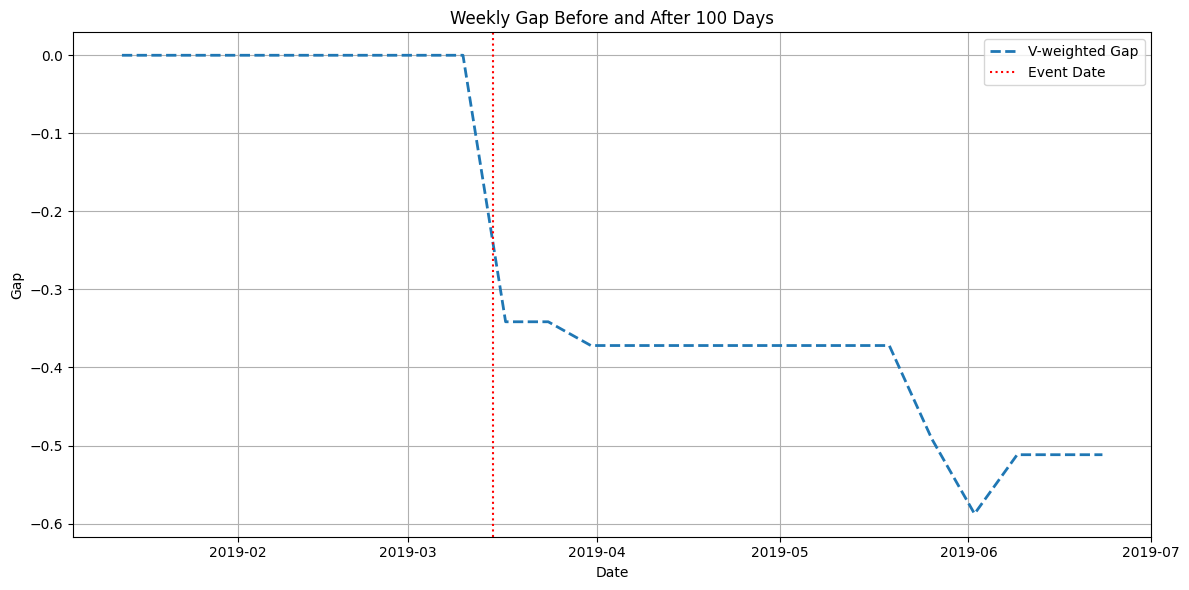

In [71]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_tlcm_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KT_Close_CVaR_95', 'KR_SKT_Close_CVaR_95', 'KR_LGU+_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_tlcm_cvar = gap.flatten() * v_full
weekly_weighted_gap_series_tlcm_cvar = pd.Series(weekly_weighted_gap_tlcm_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)


plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_tlcm_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 헬스케어

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2703721935.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/2703721935.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


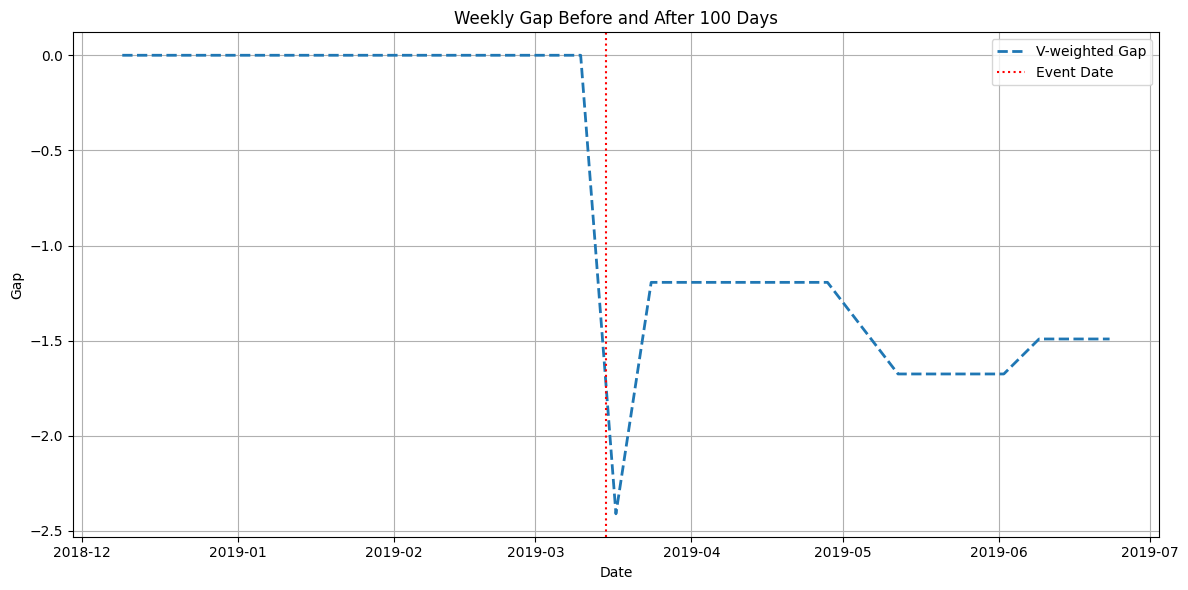

In [72]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_healthcare_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_SamsungBio_Close_CVaR_95' ,'KR_Celltrion_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_healthcare_cvar = gap.flatten() * v_full
weekly_weighted_gap_series_healthcare_cvar = pd.Series(weekly_weighted_gap_healthcare_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_healthcare_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 항공

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3181733240.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3181733240.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


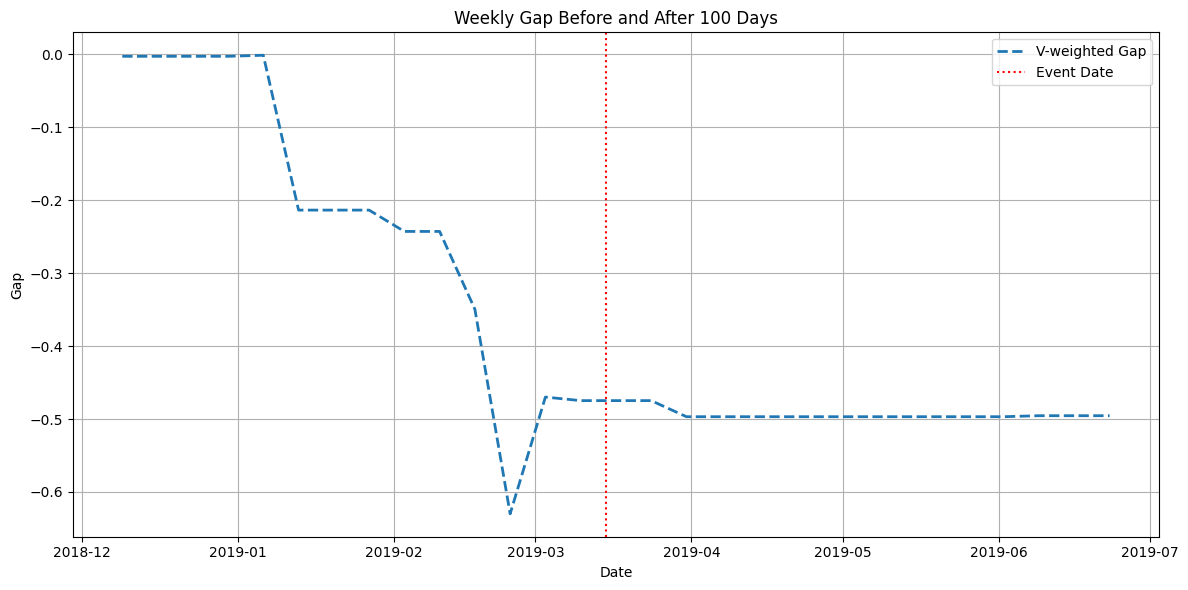

In [73]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_aerospace_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Korean_Close_CVaR_95', 'KR_Asiana_Close_CVaR_95', 'KR_Jeju_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_aerospace_cvar = gap.flatten() * v_full
weekly_weighted_gap_series_aerospace_cvar = pd.Series(weekly_weighted_gap_aerospace_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_aerospace_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 자동차

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/561275133.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/561275133.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


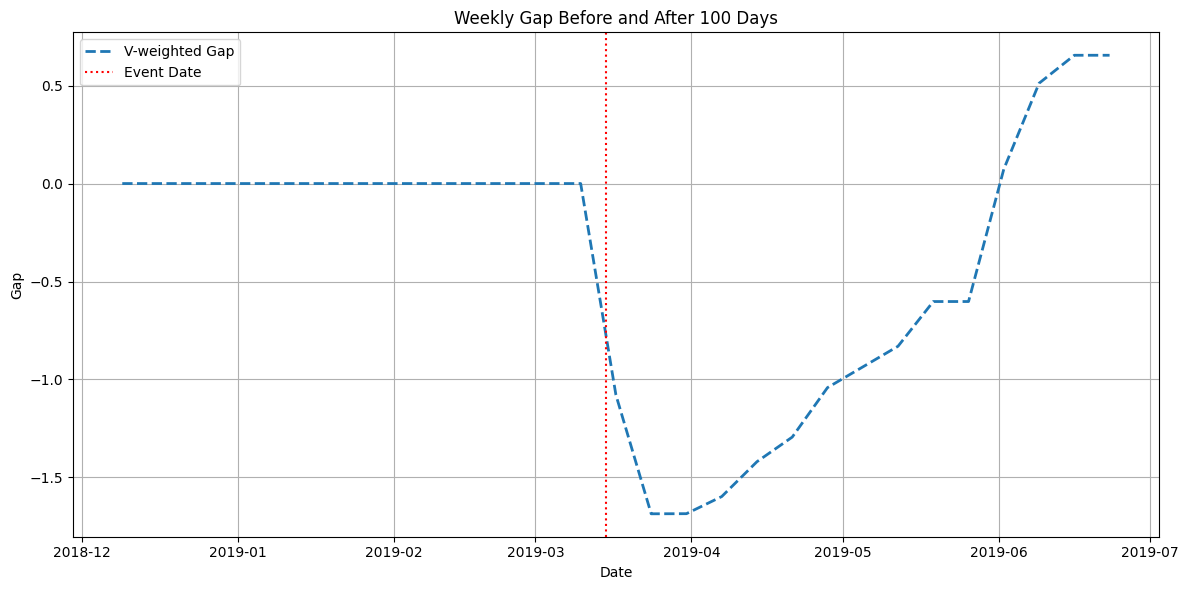

In [74]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_automobile_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Hyundai_Close_CVaR_95', 'KR_Kia_Close_CVaR_95', 'KR_KG Mobility_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_automobile_cvar = gap.flatten() * v_full
weekly_weighted_gap_series_automobile_cvar = pd.Series(weekly_weighted_gap_automobile_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_automobile_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 반도체

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3089760592.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3089760592.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


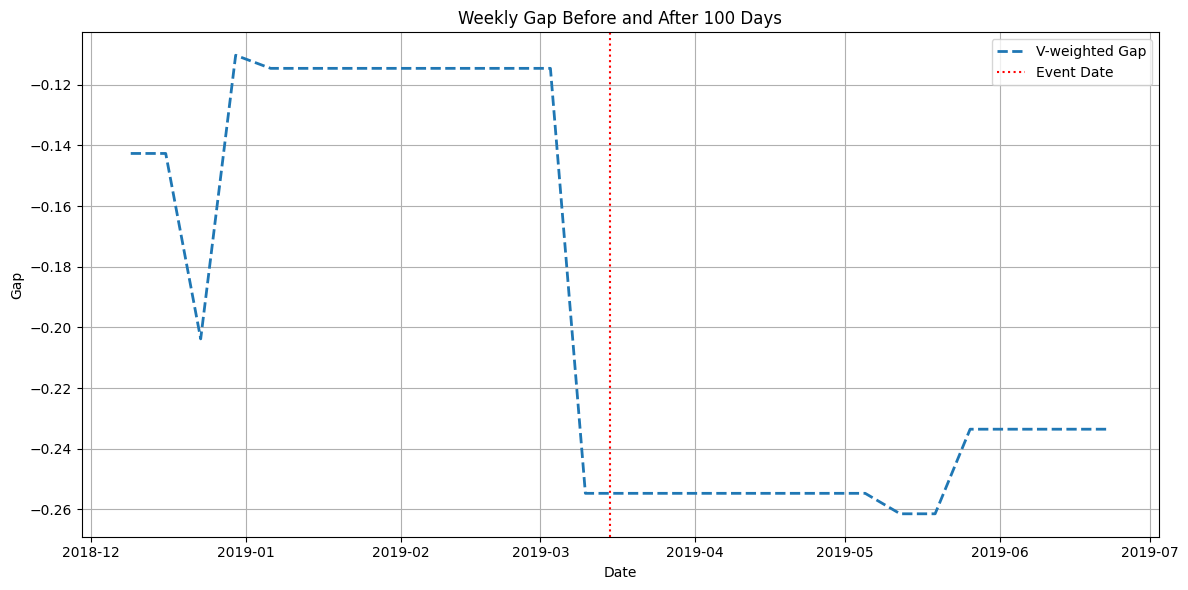

In [75]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_semi_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Samsung_Close_CVaR_95', 'KR_SK_Hynix_Close_CVaR_95', 'KR_Hanmi_Semicon_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_semi_cvar = gap.flatten() * v_full
weekly_weighted_gap_series_semi_cvar = pd.Series(weekly_weighted_gap_semi_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_semi_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 금융

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3007538347.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/3007538347.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


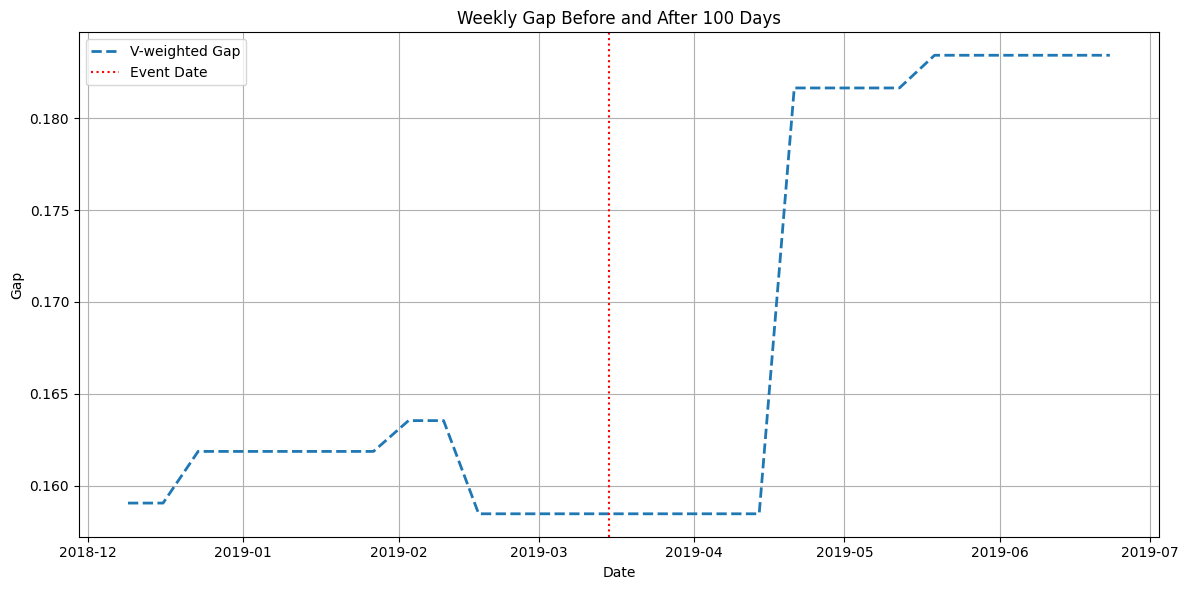

In [76]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_fin_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_KB금융지주_Close_CVaR_95', 'KR_삼성증권_Close_CVaR_95', 'KR_삼성생명_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_fin_cvar = gap.flatten() * v_full
weekly_weighted_gap_series_fin_cvar = pd.Series(weekly_weighted_gap_fin_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_fin_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### IT

/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1202377412.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)
/var/folders/kx/d5kp3v2x6cxd_1m2kn7fh3n40000gn/T/ipykernel_6188/1202377412.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(residual.T @ V @ residual)


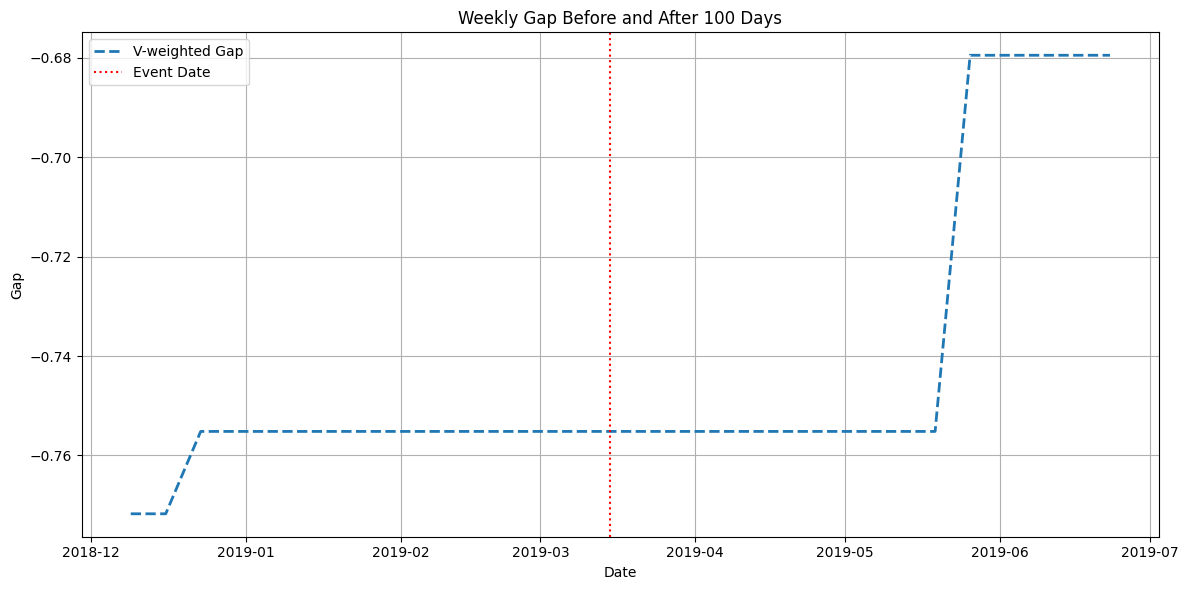

In [77]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

df = weekly_df_it_cvar

# 2. 이벤트 전 60일 기준 날짜 선정
train_dates = df.index[df.index < event_date].sort_values(ascending=False)[:pre_event_days]
train_dates = train_dates.sort_values()

treatment_cols = ['KR_Naver Corp_Close_CVaR_95','KR_Kakao_Close_CVaR_95']

def safe_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # std=0이면 나누지 않음 (변화가 없는 feature)
    return (X - mean) / std

normalized_close_zscore = safe_standardize(df)


X1_raw = normalized_close_zscore.loc[train_dates, treatment_cols]
X1 = X1_raw.mean(axis=1).values.reshape(-1, 1)


# 4. 합성 통제군 X0: 한국 제외 나머지 국가들의 개별 통신사
non_kr_close_cols = [col for col in normalized_close_zscore.columns if not col.startswith("KR_")]
X0_df = normalized_close_zscore[non_kr_close_cols]
X0 = X0_df.loc[train_dates].values  # shape: (T x J)

#------------------------------------------------

def optimize_W(X0, X1, v):
    V = np.diag(v)
    J = X0.shape[1]
    def loss(W):
        W = np.array(W).reshape(J, 1)
        residual = X1 - X0 @ W
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(J)]
    result = minimize(loss, x0=np.ones(J) / J, bounds=bounds, constraints=constraints)
    return result.x

def optimize_V(X0, X1, W):
    residual = X1 - X0 @ W.reshape(-1, 1)
    k = residual.shape[0]
    def loss(v):
        if np.any(v < 0): return 1e6
        V = np.diag(v)
        return float(residual.T @ V @ residual)
    constraints = [{'type': 'eq', 'fun': lambda v: np.sum(v) - 1}]
    bounds = [(0, 1) for _ in range(k)]
    result = minimize(loss, x0=np.ones(k) / k, bounds=bounds, constraints=constraints)
    return result.x

def optimize_scm(X0, X1, max_iter=100, tol=1e-6):
    k = X0.shape[0]
    v = np.ones(k) / k
    prev_loss = float('inf')
    losses = []
    for t in range(max_iter):
        W = optimize_W(X0, X1, v)
        v = optimize_V(X0, X1, W)
        residual = X1 - X0 @ W.reshape(-1, 1)
        V = np.diag(v)
        loss_val = float((residual.T @ V @ residual)[0, 0])
        losses.append(loss_val)
        if abs(prev_loss - loss_val) < tol:
            break
        prev_loss = loss_val
    return W, v, loss_val, losses

# SCM 최적화
W_opt, v_opt, final_loss, loss_trace = optimize_scm(X0, X1)
W_opt, v_opt, final_loss

#------------------------------------------------

import matplotlib.pyplot as plt

# 1. 전체 기간의 처리군 데이터
X1_full_raw = normalized_close_zscore[treatment_cols]


X1_full_df = X1_full_raw.mean(axis=1).values.reshape(-1, 1)
X1_full = pd.DataFrame(X1_full_df, index=X1_full_raw.index, columns=['X1'])

# -----------------------------
# 2. 통제군 전체 시계열에서도 동일하게 스케일링
# -----------------------------
X0_full_raw = normalized_close_zscore[non_kr_close_cols]                
           
# 1. W 적용해서 통제군 평균 시계열 만들기
X0_full = X0_df.values @ W_opt.reshape(-1, 1)  # shape: (752, 1)


# 1. gap 계산
gap = X1_full.values.reshape(-1, 1) - X0_full  # (T x 1)
gap_series = pd.Series(gap.flatten(), index=X1_full.index, name='Gap')

# 2. weighted gap 계산 (v 확장)
T_pre = len(v_opt)
T_full = len(gap_series)
T_post = T_full - T_pre
v_full = np.concatenate([v_opt, np.ones(T_post)])
weekly_weighted_gap_it_cvar = gap.flatten() * v_full
weekly_weighted_gap_series_it_cvar = pd.Series(weekly_weighted_gap_it_cvar, index=X1_full.index, name='Weighted_Gap')

# 해당 구간의 인덱스만 필터링
mask = (X1_full.index >= plot_start) & (X1_full.index <= plot_end)

plt.figure(figsize=(12, 6))
plt.plot(weekly_weighted_gap_series_it_cvar.loc[mask], label='V-weighted Gap', linestyle='--', linewidth=2)
plt.axvline(event_date, color='red', linestyle=':', label='Event Date')
plt.title("Weekly Gap Before and After 100 Days")
plt.xlabel("Date")
plt.ylabel("Gap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Weekly CVaR 종합

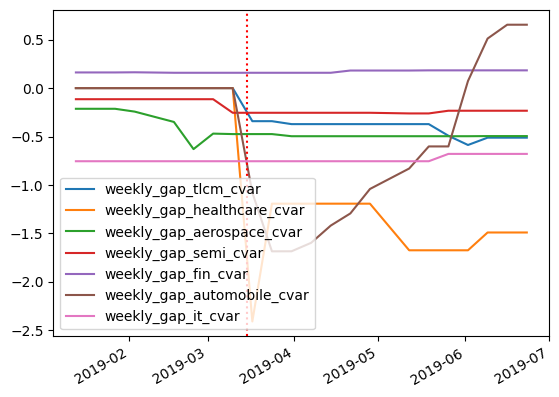

In [78]:
weekly_df_gap_cvar = pd.DataFrame({'weekly_gap_tlcm_cvar': weekly_weighted_gap_series_tlcm_cvar[plot_start:plot_end], 'weekly_gap_healthcare_cvar': weekly_weighted_gap_series_healthcare_cvar[plot_start:plot_end],
                              'weekly_gap_aerospace_cvar': weekly_weighted_gap_series_aerospace_cvar[plot_start:plot_end], 'weekly_gap_semi_cvar': weekly_weighted_gap_series_semi_cvar[plot_start:plot_end],
                              'weekly_gap_fin_cvar': weekly_weighted_gap_series_fin_cvar[plot_start:plot_end], 'weekly_gap_automobile_cvar': weekly_weighted_gap_series_automobile_cvar[plot_start:plot_end],
                              'weekly_gap_it_cvar': weekly_weighted_gap_series_it_cvar[plot_start:plot_end]})

weekly_df_gap_cvar = weekly_df_gap_cvar.dropna(axis = 0)
ax = weekly_df_gap_cvar.plot()
ax.axvline(event_date, color='red', linestyle=':', label='Event Date')


In [79]:
weekly_df_gap_cvar.to_excel(f"weekly_df_gap_cvar_{event_date:%Y-%m-%d}.xlsx", index = True)